<a href="https://colab.research.google.com/github/Hugo-Andres/Optimizaci_n_Marketing/blob/main/Proyecto_Final_Diplomatura_Oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una empresa de alimentación quiere producir el mayor beneficio en la próxima campaña de marketing directo, prevista para el mes que viene.

Se llevó a cabo una campaña piloto en la que participaron 2.240 clientes, que aceptaron la oferta con el nivel adecuado. El coste total de la campaña piloto fue de 6.720MU y los ingresos generados por los clientes que aceptaron la oferta fueron de 3.674MU.

La campaña tuvo una tasa de éxito del 15%.

OBJETIVOS

Exploración de datos
Segmentación de clientes en base a su comportamiento de compra
Modelo de clasificación para predecir el éxito en futuras campañas

La empresa

Consideremos una empresa consolidada que opera en el sector de la alimentación al por menor.
Actualmente cuentan con unos cientos de miles de clientes registrados y atienden a casi un millón de consumidores al año. Venden productos de 5 grandes categorías: vinos, productos cárnicos raros, frutas exóticas, pescado especialmente preparado y productos dulces.

Estos pueden dividirse a su vez en productos de oro y productos normales.
Los clientes pueden pedir y adquirir productos a través de 3 canales: tiendas físicas, catálogos y página web de la empresa.


**Columnas del conjunto de datos**:

Income:Ingresos anuales dcel cliente

Kidhome: Cantidad de infantes en la casa del cliente

Teenhome: cantidad de dadolescentes en la casa del cliente

Recency: numero de días desde la última compra

MntWines: Cantidad gastada en productos de vino en los últimos 2 años

MntFruits: Cantidad gastada en frutas en los últimos 2 años

MntMeatProducts: Cantidad gastada en poductos de carne en los últimos 2 años

MntFishProducts: Cantidad gastada en productos de pescado en los últimos 2 años

MntSweetProducts: Cantidad gastada en productos dulces en los últimos 2 años.

MntGoldProds: Cantidad gastada en productos de oro en los últimos 2 años.

NumDealsPurchases:Número de compras realizadas con descuento.

NumCatalogPurchases: Número de compras por catálogo

NumStorePurchases: Número de compras realizadas directamente en tiendas.

NumWebPurchases: Número de compras realizadas en el sitio web de la empresa.

NumWebVisitMonth: Número de visitas al sitio web de la empresa en el último mes.

Response: respuesta del cliente a la oferta (si o no)

Z_CostContact: costo de contacto con el cliente

Z_Revenue: Ingresos

In [2]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

Exploración y Limpieza del conjunto de datos

En este dataset contamos con 39 columnas y 2205 filas.

Observaremos de cerca estos datos y procederemos a la limpieza adecuada para una correcta visualización.

In [3]:
files.upload()

Saving ifood_df.csv to ifood_df.csv


{'ifood_df.csv': b'Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall\n58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0\n46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0\n71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0\n26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0\n58293.0,1,0,94,173,43,118,46,27,15,5,5,3

In [4]:
df = pd.read_csv("ifood_df.csv")

In [5]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Vamos a modificar algunas columnas para favorecer la visualización

In [6]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [8]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [9]:
df.shape

(2205, 39)

In [10]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Income,2205.000000,51622.094785,20713.063826,1730.000000,35196.000000,51287.000000,68281.000000,113734.000000
Kidhome,2205.000000,0.442177,0.537132,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2205.000000,0.506576,0.544380,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2205.000000,49.009070,28.932111,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2205.000000,306.164626,337.493839,0.000000,24.000000,178.000000,507.000000,1493.000000
MntFruits,2205.000000,26.403175,39.784484,0.000000,2.000000,8.000000,33.000000,199.000000
MntMeatProducts,2205.000000,165.312018,217.784507,0.000000,16.000000,68.000000,232.000000,1725.000000
MntFishProducts,2205.000000,37.756463,54.824635,0.000000,3.000000,12.000000,50.000000,259.000000
MntSweetProducts,2205.000000,27.128345,41.130468,0.000000,1.000000,8.000000,34.000000,262.000000
MntGoldProds,2205.000000,44.057143,51.736211,0.000000,9.000000,25.000000,56.000000,321.000000


In [11]:
#Vamos a modificar algunas columnas para favorecer la visualización,

#y luego las convertiremos en tipo entero para favorecer la estructuración de datos y el modelado.

#Vamos a agrupar todas las columnas referidas al estado civil en una sola.

#La función toma la fila como entrada y devuelve el valor de la nueva columna.

def conseguir_marital_status(fila):
  if fila['marital_Divorced']==1:
    return 'Divorced'
  elif fila['marital_Married']==1:
    return 'Married'
  elif fila['marital_Single']==1:
    return 'Single'
  elif fila['marital_Together']==1:
    return 'Together'
  else:
    return 'Widow'

#usamos el método .apply() a cada fila de la tabla

#axis=1 para fila

df['marital_status'] = df.iloc[ : , 26:31].apply(conseguir_marital_status, axis=1)

In [12]:
#Lo mismo haremos con el nivel de educación

def conseguir_level_education(fila):
  if fila['education_2n Cycle'] == 1:
    return '2nd_Cycle'
  elif fila['education_Basic'] == 1:
    return 'Basic'
  elif fila['education_Graduation'] == 1:
    return 'Graduation'
  elif fila['education_Master'] == 1:
    return 'Master'
  else:
    return 'PhD'

df['level_education'] = df.iloc[: , 31:36].apply(conseguir_level_education, axis=1)

Eliminamos las columnas inncesarias: las columnas agrupadas de estado civil y nivel de educación, junto con las columnas de Costo de Contacto e ingresos ya que cuentan con valores unicos y no nos proporcionan mas información.

In [13]:
#data2 = df['Response']
#El estado civil ya esta agrupado en una misma columna, borro las demás columnas que hacen referencia a ello.
df.drop(df[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']], axis=1, inplace=True)
#El nivel educativo ya esta agrupado todo junto en una misma columna, borro las inncesarias.
df.drop(df[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']], axis=1, inplace=True)
#Eliminamos la columna de Respuesta del cliente para adaptar los datos al modelo de Segmentación.
#df.drop(df['Response'], axis=1, inplace=True)
#Eliminamos la columna de costo de contacto e ingresos por cliente ya que no hay info necesaria.
df.drop(df[['Z_Revenue', 'Z_CostContact',]], axis=1, inplace=True)
#df.drop(df[['Income', 'Complain']], axis=1, inplace=True)
data = df.copy()

# Veremos la correlación entre variables:

<ipython-input-14-71aaef974827>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data.corr(method='pearson')


Text(0.5, 1.0, 'Correlación entre Variables')

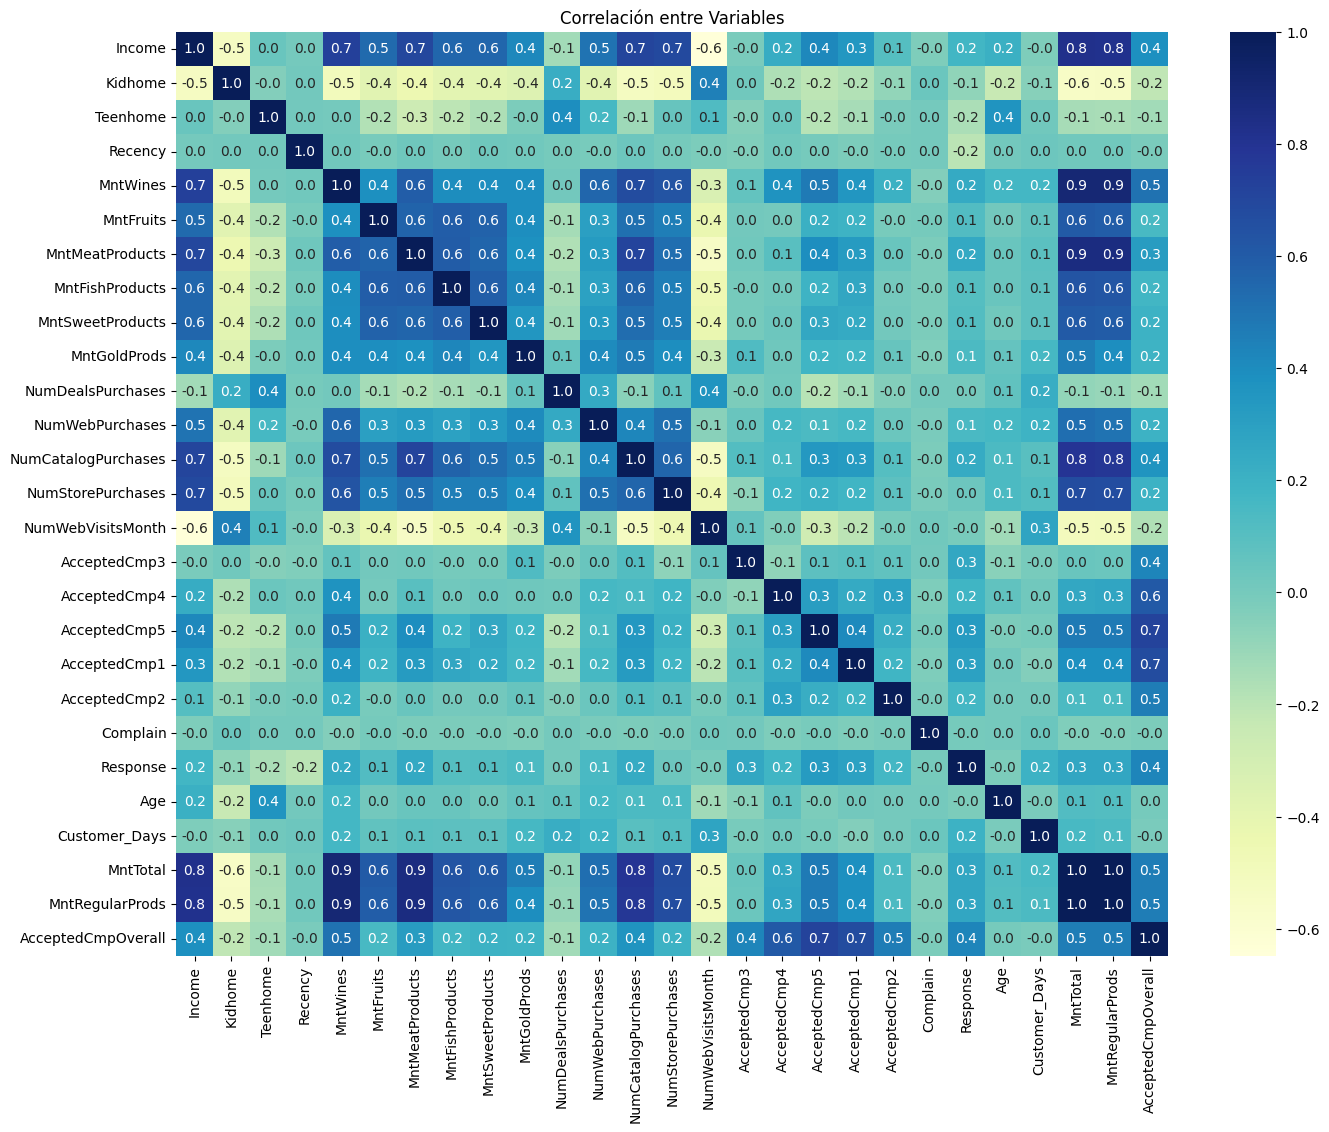

In [14]:
corr= data.corr(method='pearson')
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Correlación entre Variables')
#plt.show()
#plt.savefig("correlacion.jpg", dpi=300, bbox_inches='tight')

# Relación entre Ingresos y Gasto Total en la Campaña por cliente. También veremos la referencia de los clientes que aceptaron o no las ofertas.

Text(0.5, 1.0, 'Distribución Gasto Total según Ingresos')

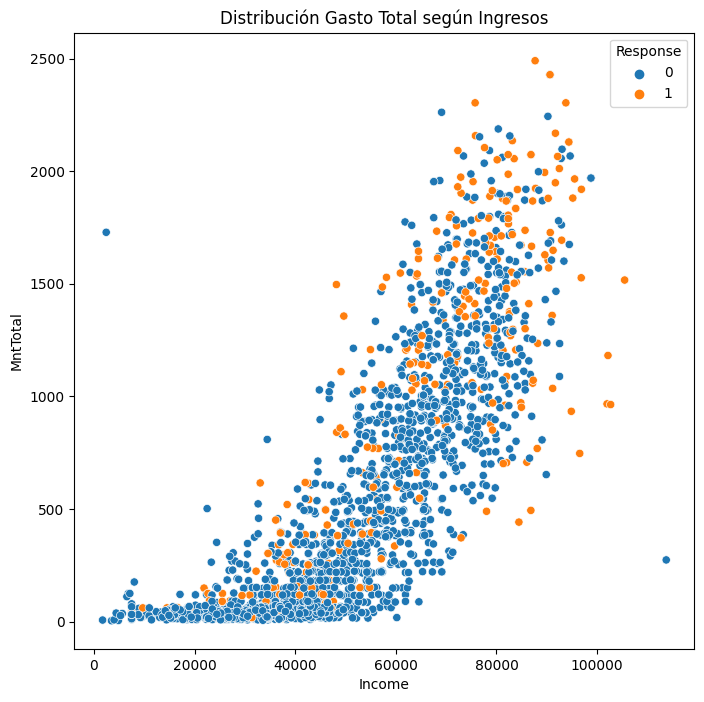

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df , x='Income', y='MntTotal', hue=df['Response'])
plt.title('Distribución Gasto Total según Ingresos')
#plt.show()
#plt.savefig("Distribución Gasto Total según Ingresos.jpg", dpi=100, bbox_inches='tight')

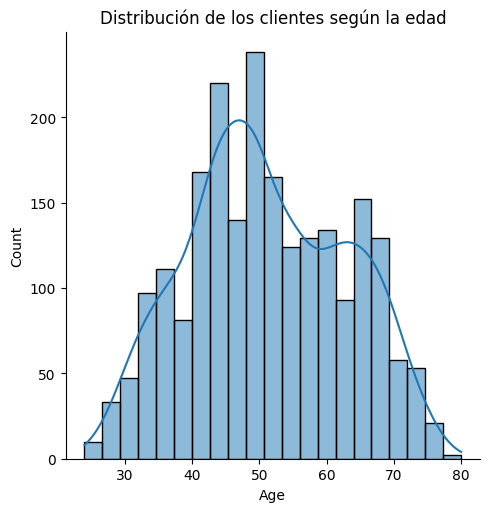

In [16]:
# DISTRIBUCIÓN DE CLIENTES SEGÚN EDAD
sns.displot(data['Age'], kind = ('hist'), kde=True)
plt.title('Distribución de los clientes según la edad');
plt.savefig("Dsitribución de clientes según edad.jpg", dpi=100, bbox_inches='tight')

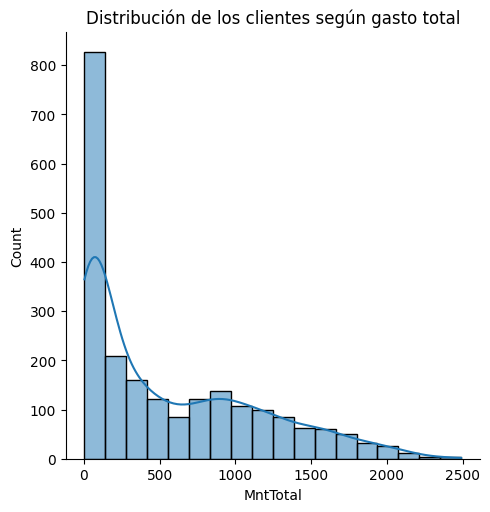

In [17]:
sns.displot(data['MntTotal'], kind = ('hist'), kde=True)
plt.title('Distribución de los clientes según gasto total');
plt.savefig("Dsitribución de clientes según Gasto Total.jpg", dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Cantidad de visitas a la página web')

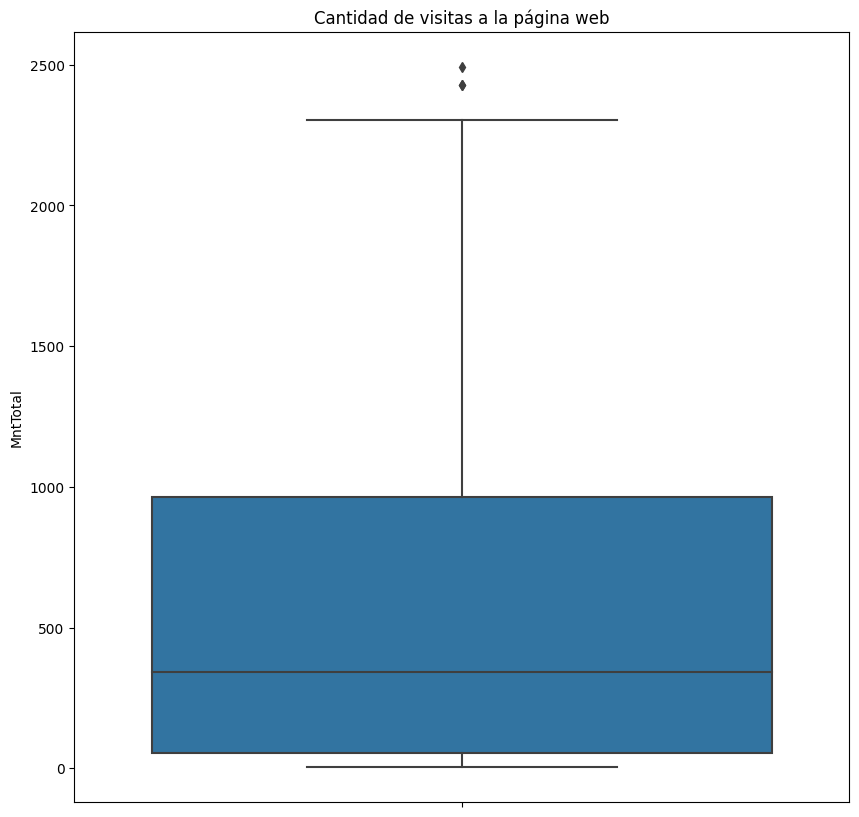

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y='MntTotal')
plt.title('Cantidad de visitas a la página web')

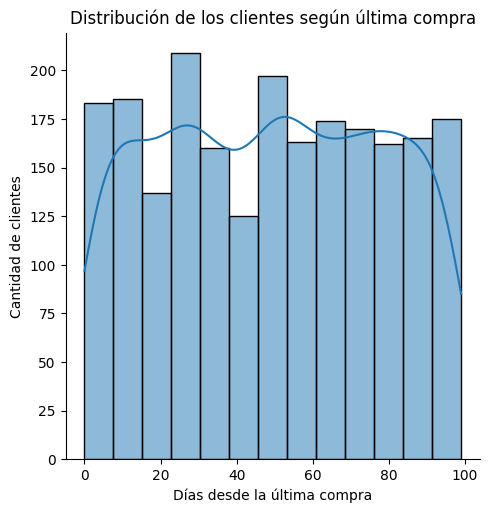

In [19]:
sns.displot(df['Recency'], kind = ('hist'), kde=True)
plt.xlabel('Días desde la última compra')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de los clientes según última compra');
plt.savefig("Dsitribución de clientes según Última Compra.jpg", dpi=100, bbox_inches='tight')

2512.718367346939


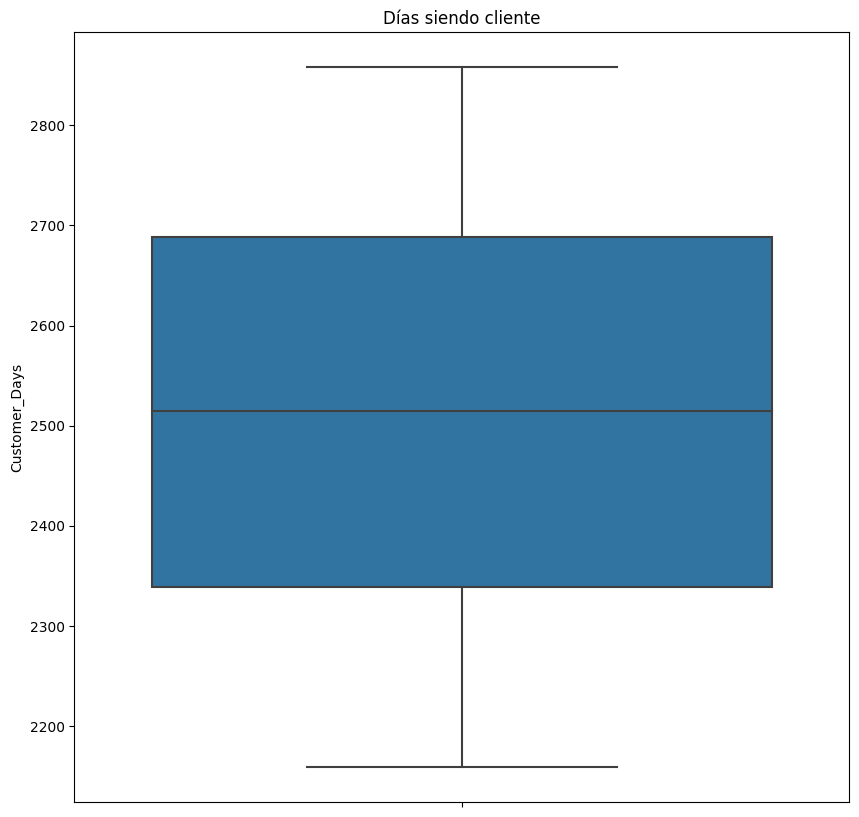

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='Customer_Days')
plt.title('Días siendo cliente')
print(data['Customer_Days'].mean())
plt.savefig("Días siendo cliente.jpg", dpi=100, bbox_inches='tight')

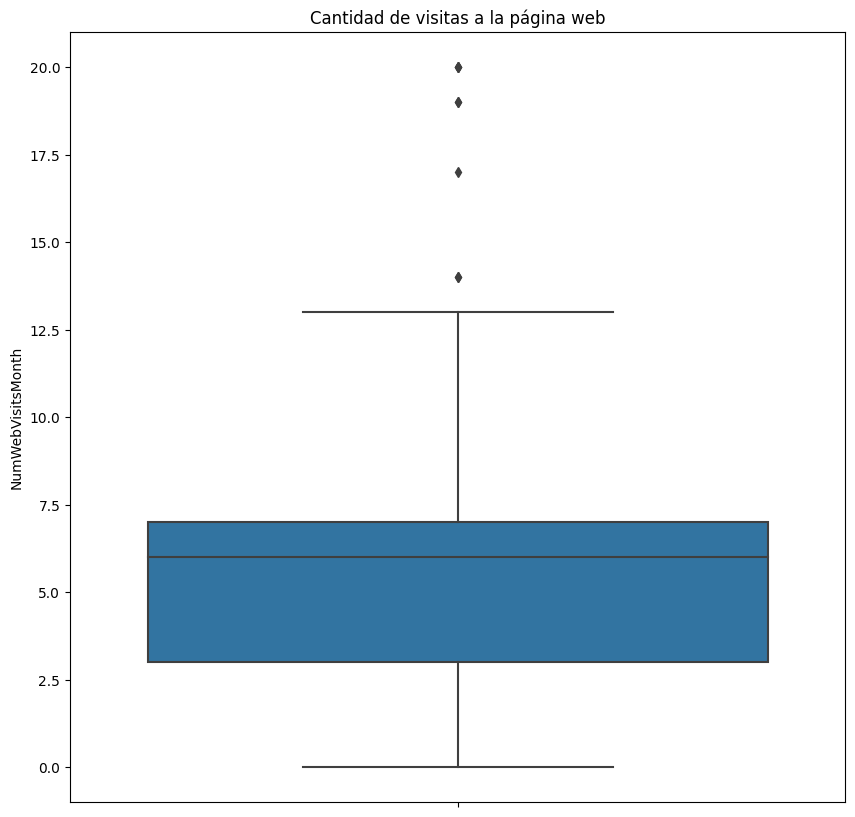

In [21]:
#Vamos a ver el número de visitas a la página web del sitio por mes.
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumWebVisitsMonth')
plt.title('Cantidad de visitas a la página web')
#plt.show()
plt.savefig("Número de visitas a Página Web por Mes.jpg", dpi=100, bbox_inches='tight')

In [ ]:
#AHORA LO HAREMOS SEGÚN EL GASTO (POCO, MEDIO, MUCHO)
#Como pudimos ver en la matriz de correlación,
#Los ingresos anuales de cada hogar están fuertemente correlacionados con el gasto total de cada cliente.
#Asi que vamos a hacer un análisis del gasto total de cada cliente según las demás variables.

In [22]:
data['Expense_Category'] = pd.qcut(df['MntTotal'], 3, labels=['Low_Expenses', 'Medium_Expenses', 'High_Expenses'])
data['Expense_Category'].value_counts()

Low_Expenses       737
Medium_Expenses    734
High_Expenses      734
Name: Expense_Category, dtype: int64

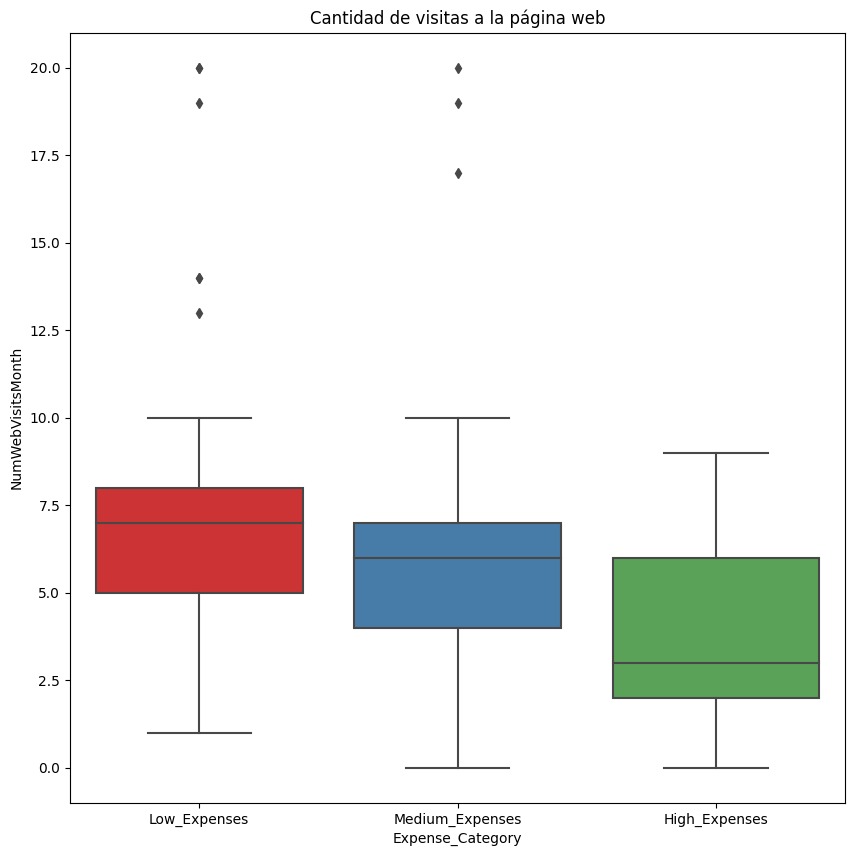

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumWebVisitsMonth', x='Expense_Category', palette='Set1')
plt.title('Cantidad de visitas a la página web')
#plt.show()
plt.savefig("Visitas a Página Web Según el Gasto Total.jpg", dpi=100, bbox_inches='tight')

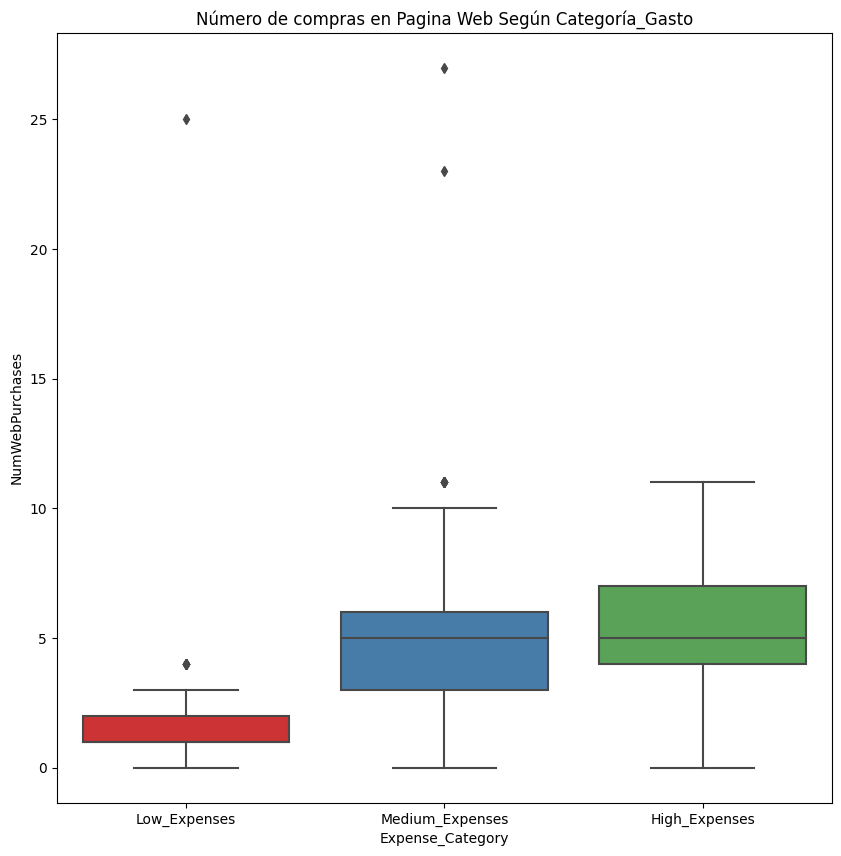

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumWebPurchases', x='Expense_Category', palette='Set1')
plt.title('Número de compras en Pagina Web Según Categoría_Gasto')
plt.savefig("Compras Página Web Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

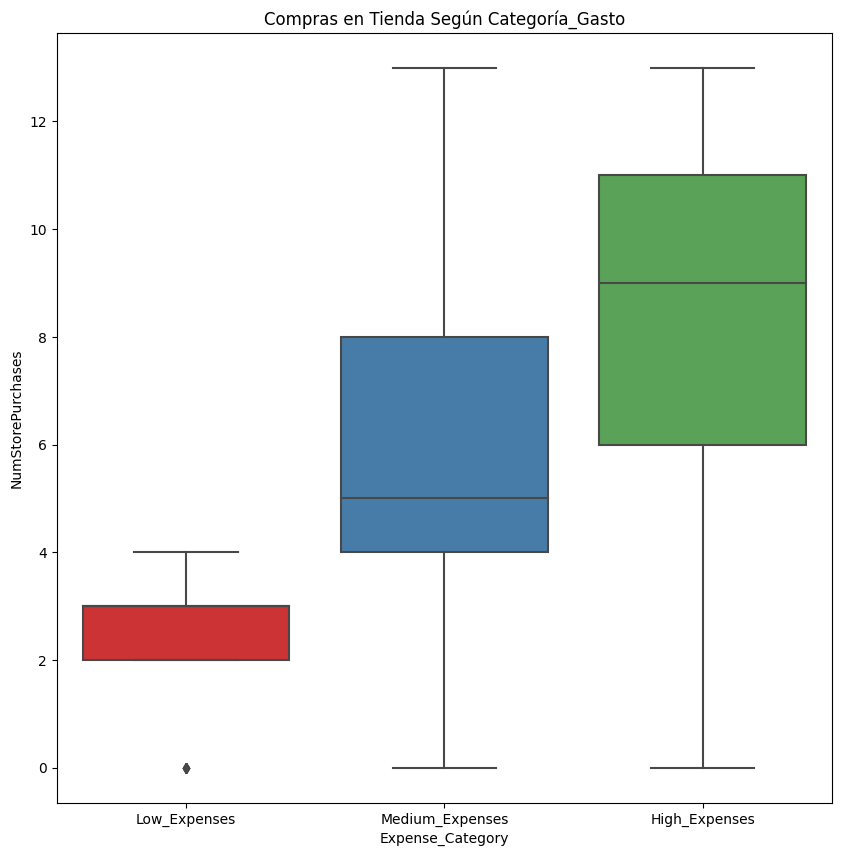

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumStorePurchases', x='Expense_Category', palette='Set1')
plt.title('Compras en Tienda Según Categoría_Gasto')
plt.savefig("Compras en Tienda Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

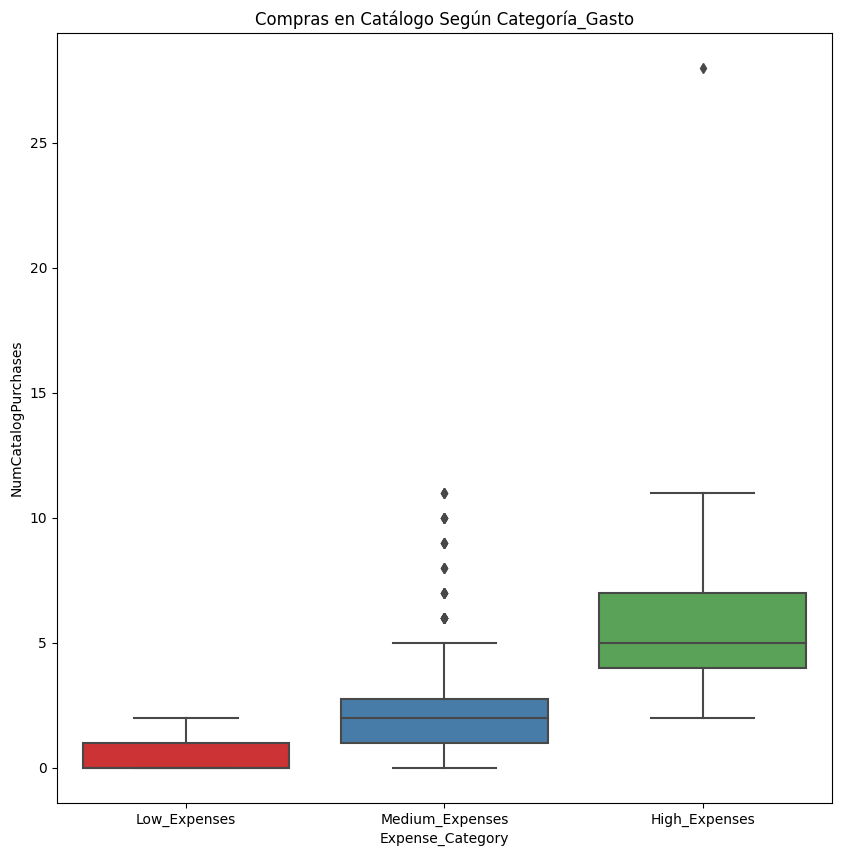

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumCatalogPurchases', x='Expense_Category', palette='Set1')
plt.title('Compras en Catálogo Según Categoría_Gasto')
plt.savefig("Compras en Catálogo Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

# VEREMOS EL LA DISTRIBUCION ENTRE EL GASTO TOTAL EN RELACION AL GASTO EN LOS DISTINTOS PRODUCTOS, Y LUEGO CADA PRODUCTO EN RELACIÓN A LA CATEGORÍA _GASTO

In [44]:
fig = px.scatter(data, y='MntWines', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Vinos según Gasto Total')

In [46]:
fig = px.scatter(data, y='MntRegularProds', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Prod Regulares según Gasto Total')

In [47]:
fig = px.scatter(data, y='MntMeatProducts', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Carnes según Gasto Total')

In [48]:
fig = px.scatter(data, y='MntFishProducts', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Pescados según Gasto Total')

In [49]:
fig = px.scatter(data, y='MntFruits', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Frutas según Gasto Total')

In [50]:
fig = px.scatter(data, y='MntGoldProds', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Prods de Oro según Gasto Total')

In [51]:
fig = px.scatter(data, y='MntSweetProducts', x='MntTotal', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Dulces según Gasto Total')

In [52]:
fig = px.scatter(data, y='MntRegularProds', x='MntWines', color='Kidhome')
fig.update_layout(title='Relación de Gasto en Productos Regulares segùn Gasto en Vinos')

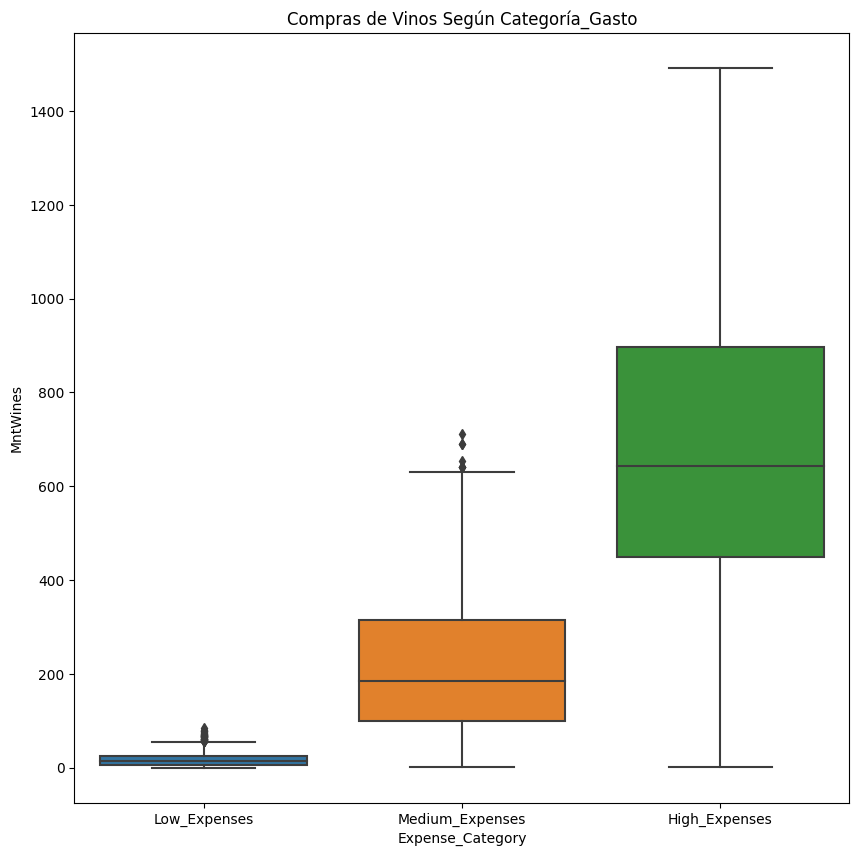

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntWines', x='Expense_Category')
plt.title('Compras de Vinos Según Categoría_Gasto')
plt.savefig("Compras de Vinos Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

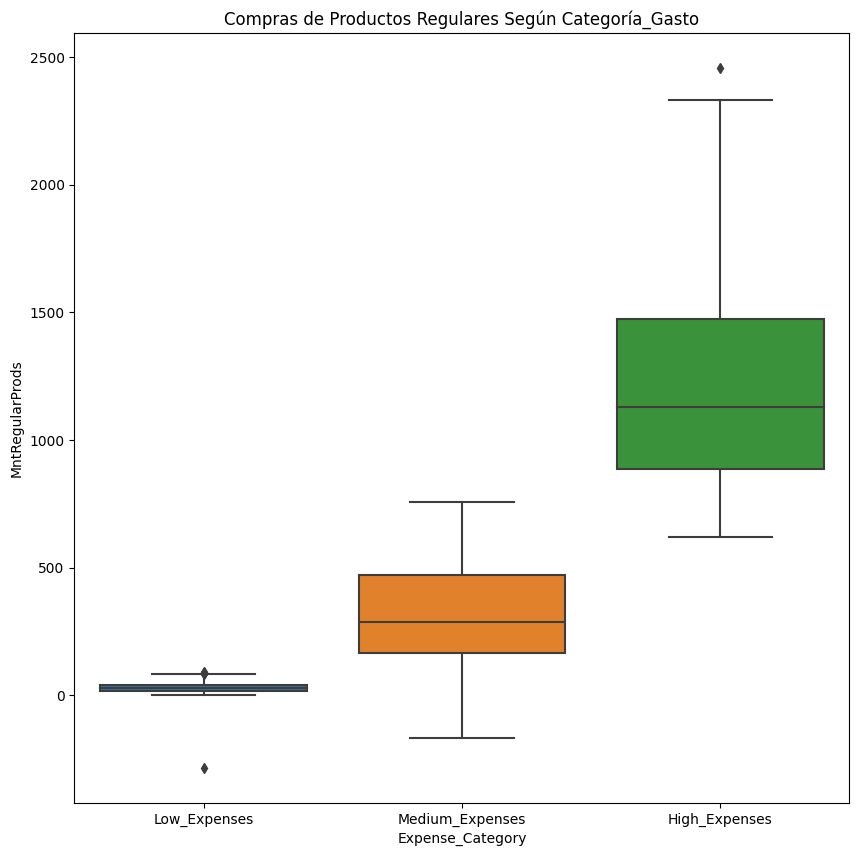

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntRegularProds', x='Expense_Category')
plt.title('Compras de Productos Regulares Según Categoría_Gasto')
plt.savefig("Compras de Productos Regulares Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

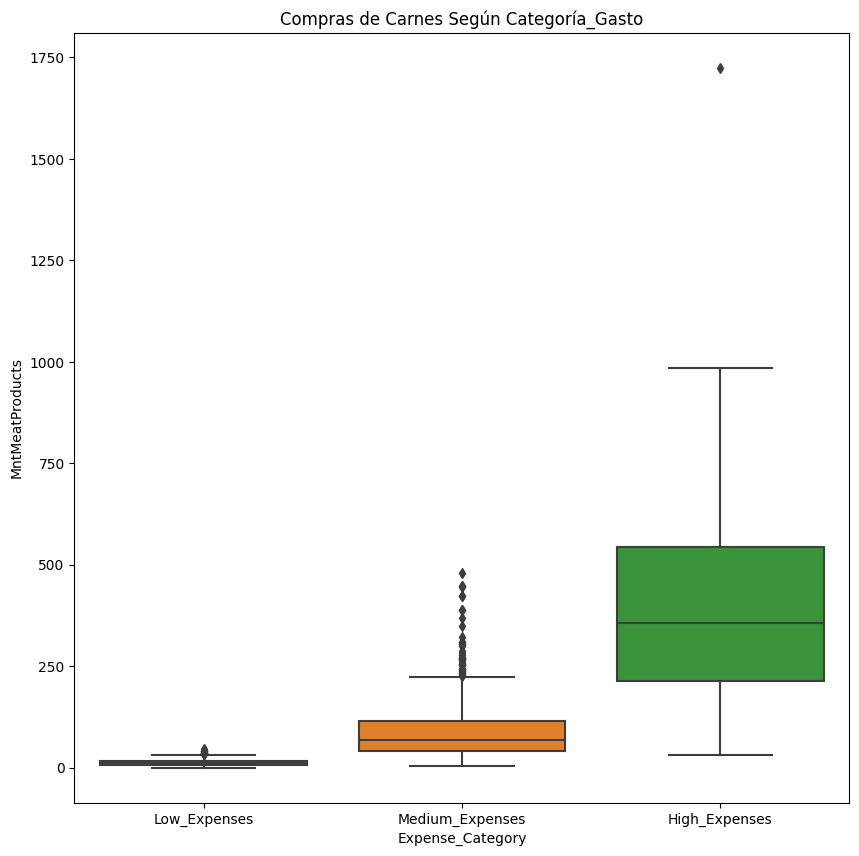

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntMeatProducts', x='Expense_Category')
plt.title('Compras de Carnes Según Categoría_Gasto')
plt.savefig("Compras de Carnes Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

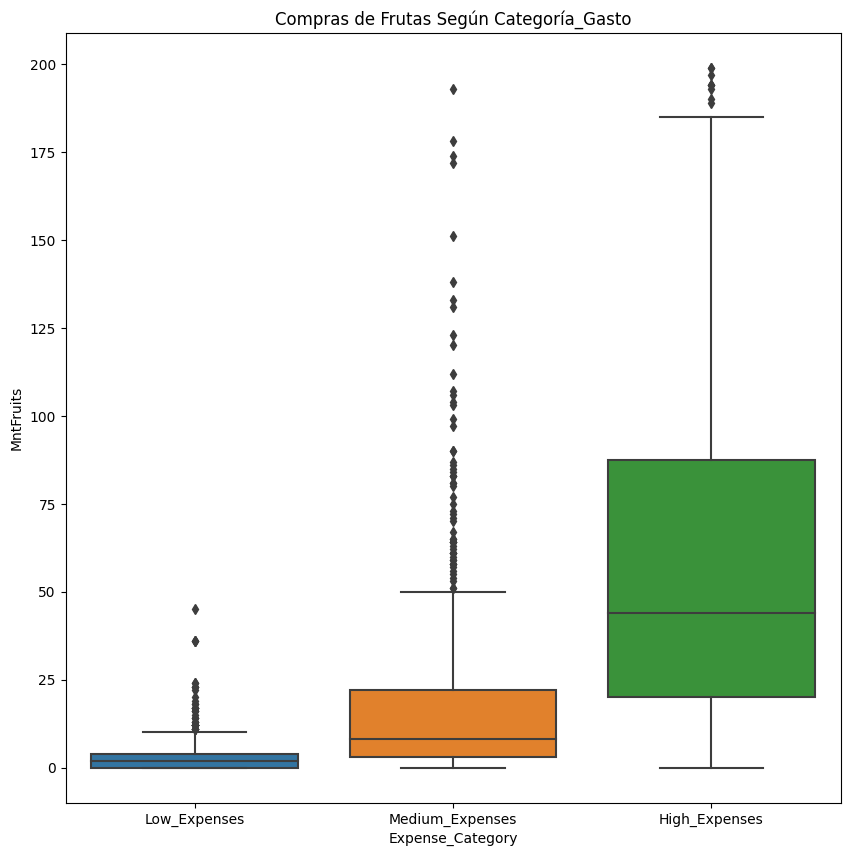

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntFruits', x='Expense_Category')
plt.title('Compras de Frutas Según Categoría_Gasto')
plt.savefig("Compras de Frutas Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

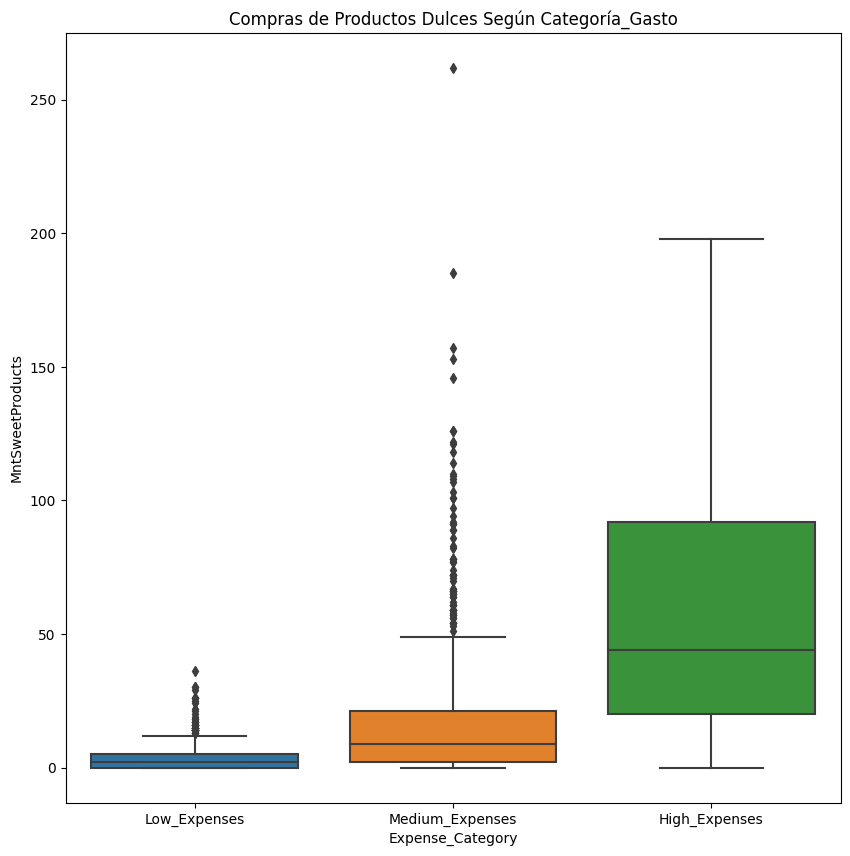

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntSweetProducts', x='Expense_Category')
plt.title('Compras de Productos Dulces Según Categoría_Gasto')
plt.savefig("Compras de Productos Dulces Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

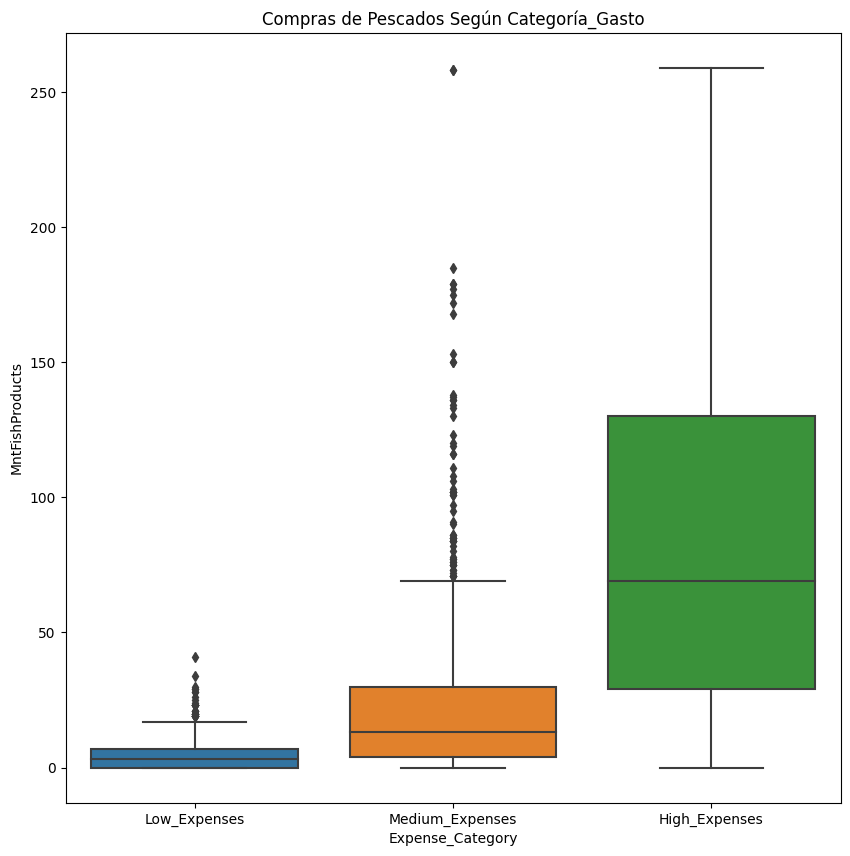

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntFishProducts', x='Expense_Category')
plt.title('Compras de Pescados Según Categoría_Gasto')
plt.savefig("Compras de Pescados Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

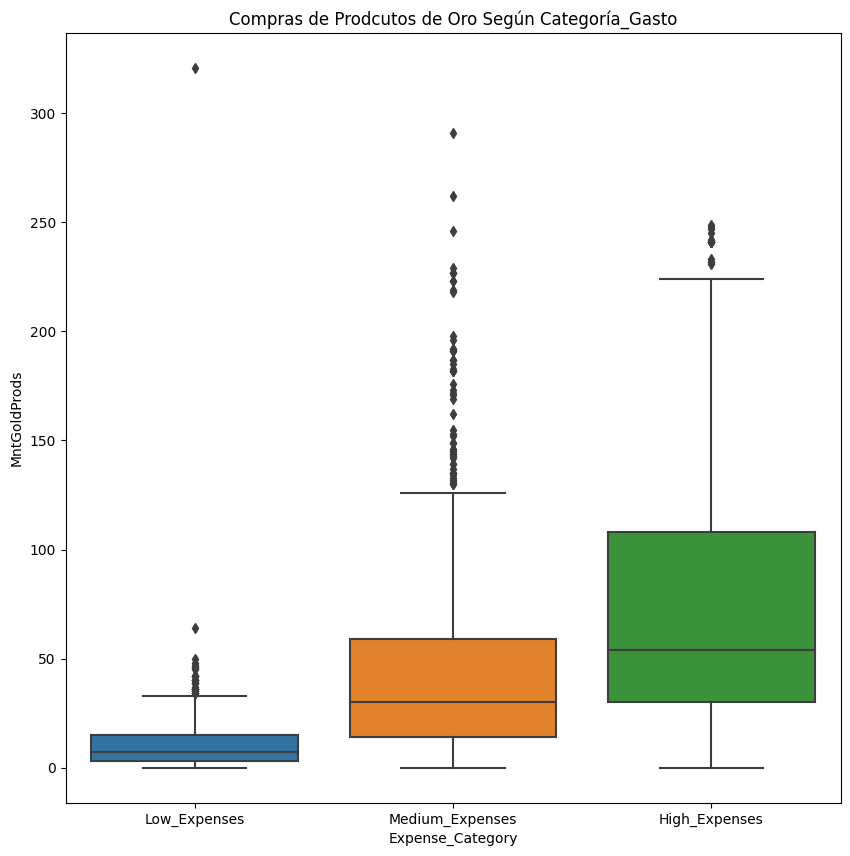

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='MntGoldProds', x='Expense_Category')
plt.title('Compras de Prodcutos de Oro Según Categoría_Gasto')
plt.savefig("Compras de Prodcutos de Oro Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

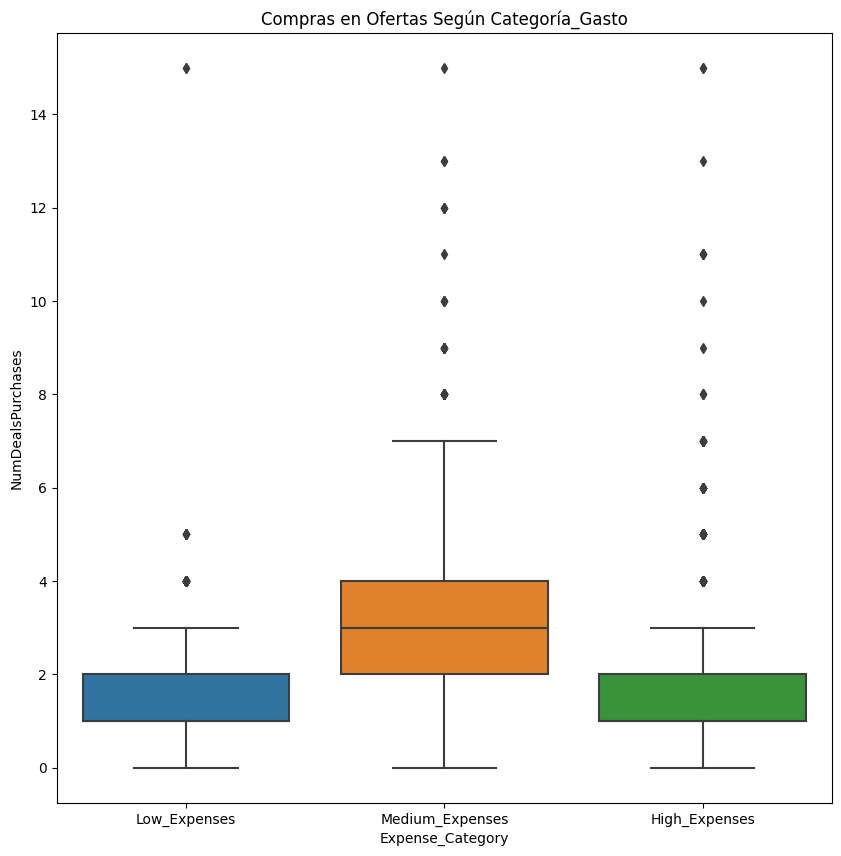

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='NumDealsPurchases', x='Expense_Category')
plt.title('Compras en Ofertas Según Categoría_Gasto')
plt.savefig("Compras en Ofertas Según Categoría_Gasto.jpg", dpi=100, bbox_inches='tight')

# Cantidad de niños en casa por cliente y cantidad de niños en casa segúm Categoría_Gasto

Kidhome
0    1276
1     883
2      46
dtype: int64


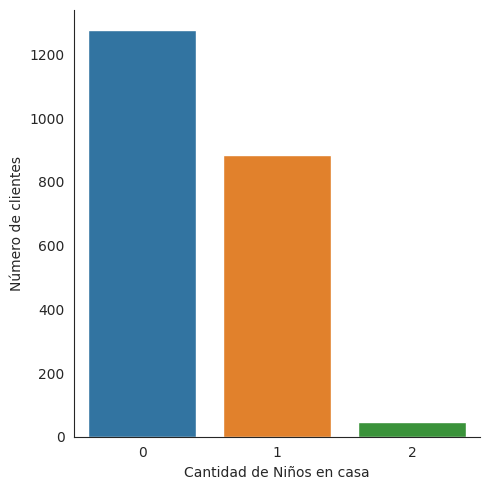

In [73]:
sns.catplot(x='Kidhome', data=df, kind='count')
plt.xlabel('Cantidad de Niños en casa')
plt.ylabel('Número de clientes')
print(df.groupby('Kidhome').size());

Text(0.5, 1.0, 'Relación de Categoría_Gasto Según Cantidad de Niños en Casa')

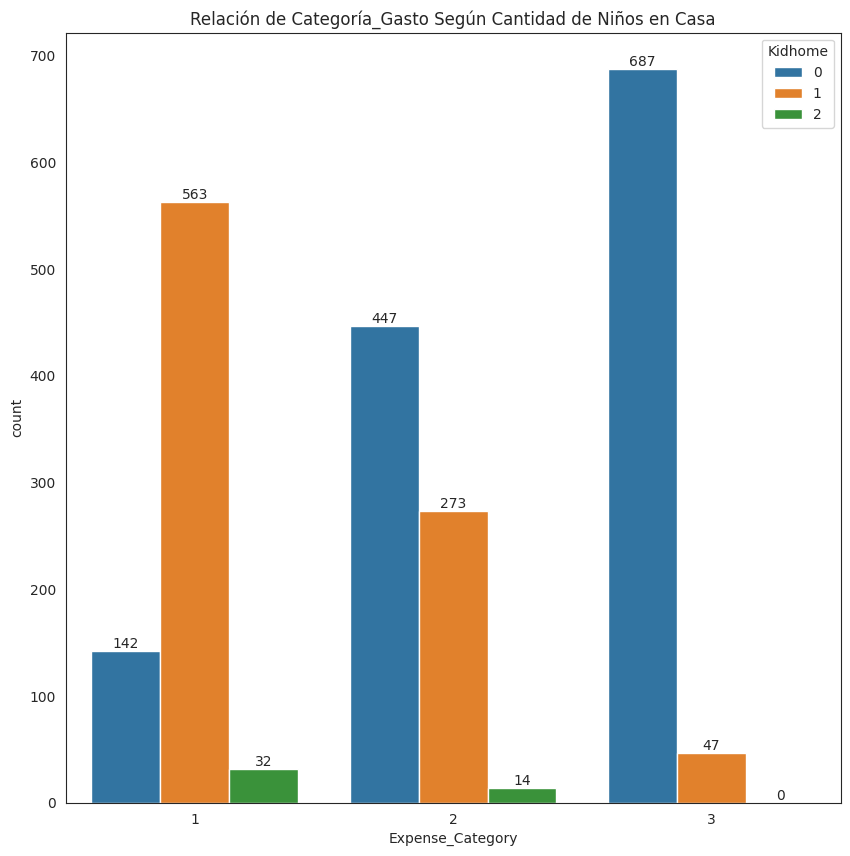

In [58]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = data.Expense_Category, hue = data.Kidhome)
for i in ax.containers :
    plt.bar_label(i)
plt.title('Relación de Categoría_Gasto Según Cantidad de Niños en Casa')

Podemos visualizar que quienes tuvieron gastos más altos, no tenian niños en casa,
siguiendo los que tienen un sólo niño.

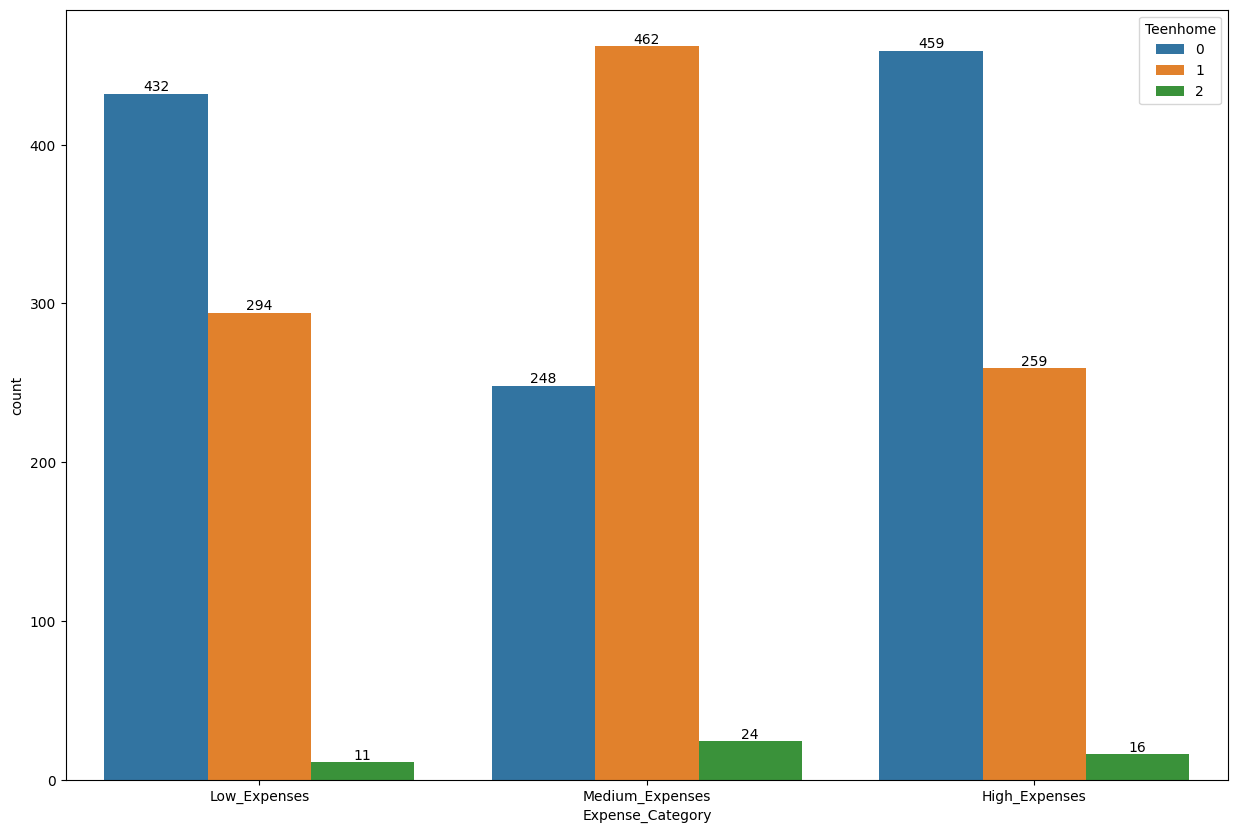

In [36]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = data.Expense_Category, hue = df.Teenhome)
for i in ax.containers :
    plt.bar_label(i)

Text(0.5, 1.0, 'Relación de Categoría_Gasto Según Estado Civil')

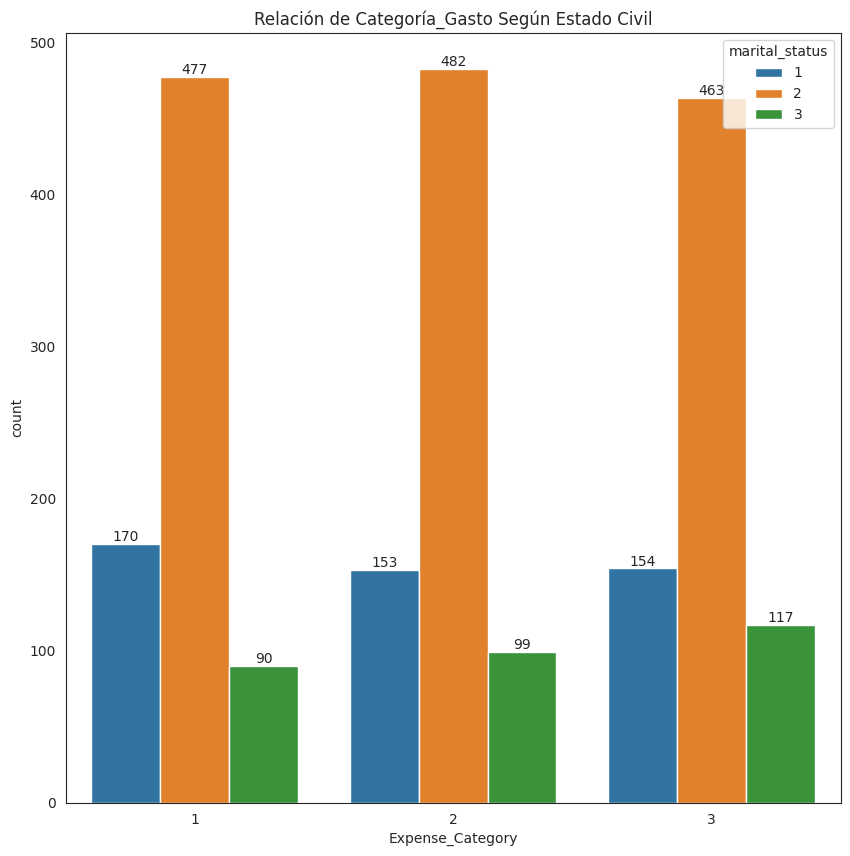

In [66]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = data.Expense_Category, hue = data.marital_status)
for i in ax.containers :
    plt.bar_label(i)
plt.title('Relación de Categoría_Gasto Según Estado Civil')

Veremos el gasto total de los clientes que respondieron y no respondieron a la campaña y como fue su gasto en cada campaña.

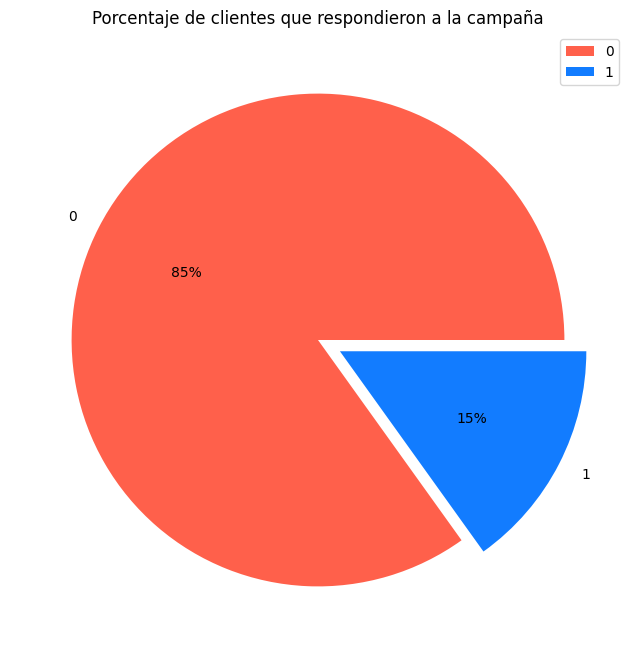

In [37]:
plt.figure(figsize=(15,8))
colores = ['#FF604B','#127CFF']#127CFF #895AFF
desfase = (0, 0.1)
plt.pie(df['Response'].value_counts().values,labels=df['Response'].value_counts().index, autopct='%.0f%%',explode=desfase, colors=colores)
plt.legend(loc='upper right')
plt.title("Porcentaje de clientes que respondieron a la campaña")
#plt.show()
plt.savefig("Porcentaje de clientes que respondieron a la campaña.jpg", dpi=100, bbox_inches='tight')

0    2063
1     142
Name: AcceptedCmp1, dtype: int64


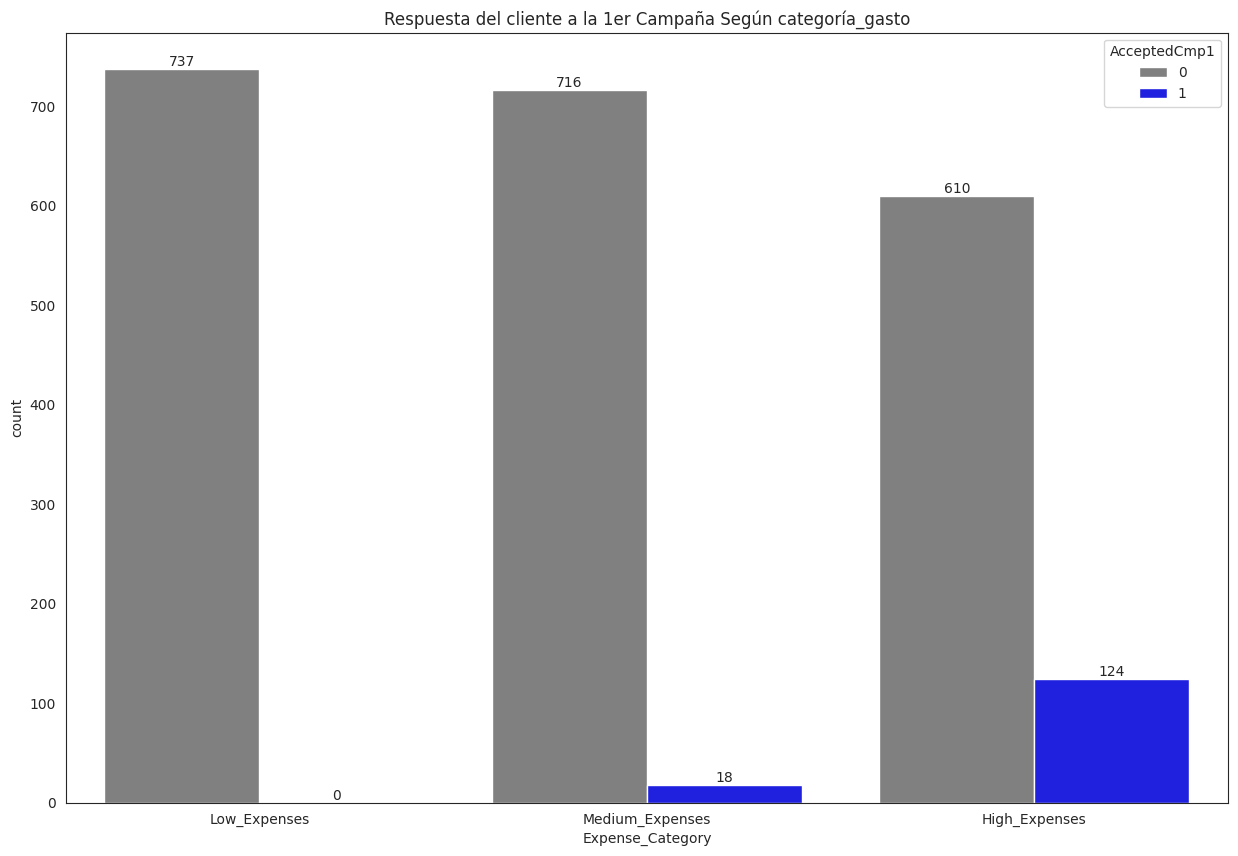

In [38]:
plt.figure(figsize=(15,10))
sns.set_style("white")
plt.title('Respuesta del cliente a la 1er Campaña Según categoría_gasto')
ax = sns.countplot(x = data.Expense_Category, hue = data.AcceptedCmp1, palette=sns.blend_palette(['grey','blue','blue','blue'],4))
for i in ax.containers :
    plt.bar_label(i)
print(data.AcceptedCmp1.value_counts())
plt.savefig("Respuesta del cliente a la 1er Campaña Según categoría_gasto.jpg", dpi=100, bbox_inches='tight')

0    2175
1      30
Name: AcceptedCmp2, dtype: int64


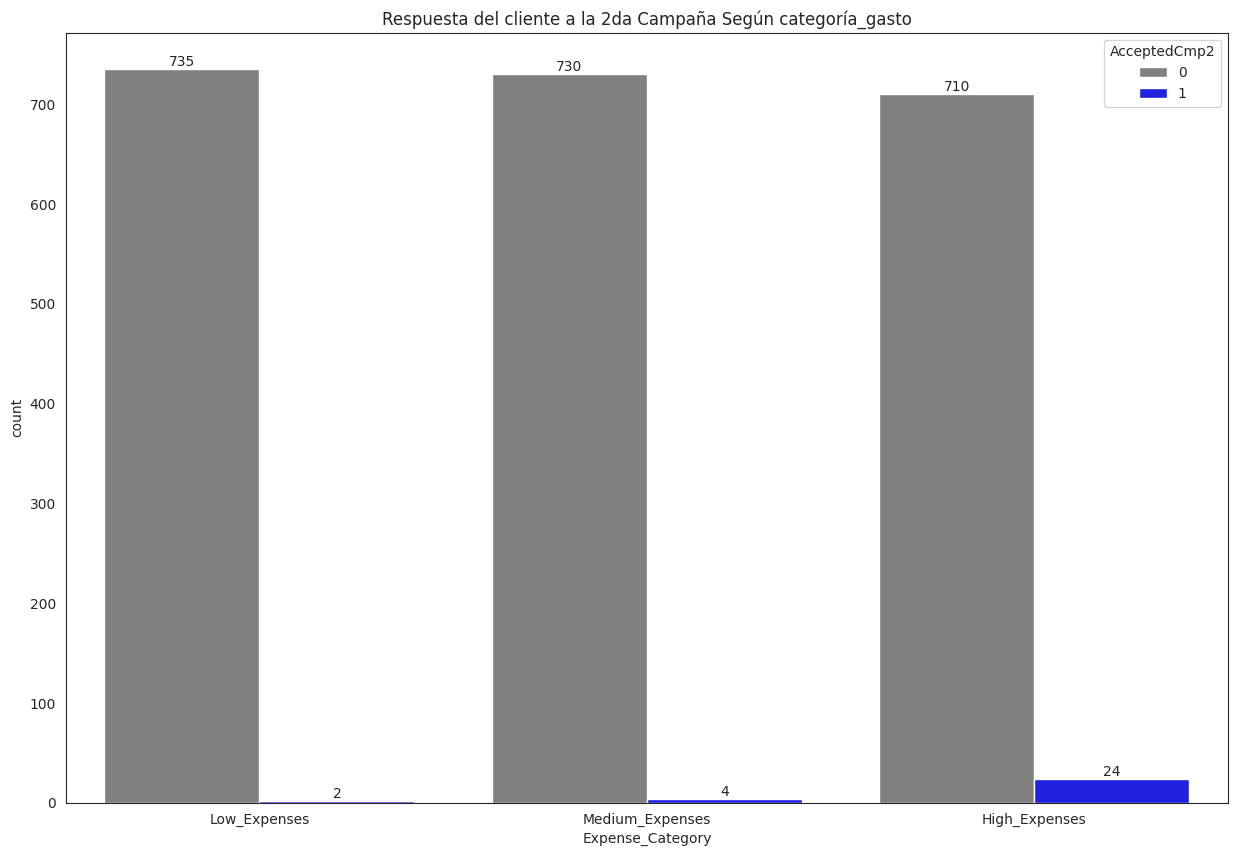

In [39]:
plt.figure(figsize=(15,10))
sns.set_style("white")
plt.title('Respuesta del cliente a la 2da Campaña Según categoría_gasto')
ax = sns.countplot(x = data.Expense_Category, hue = data.AcceptedCmp2, palette=sns.blend_palette(['grey','blue','blue','blue'],4))
for i in ax.containers :
    plt.bar_label(i)
print(data.AcceptedCmp2.value_counts())
plt.savefig("Respuesta del cliente a la 2da Campaña Según categoría_gasto.jpg", dpi=100, bbox_inches='tight')

0    2042
1     163
Name: AcceptedCmp3, dtype: int64


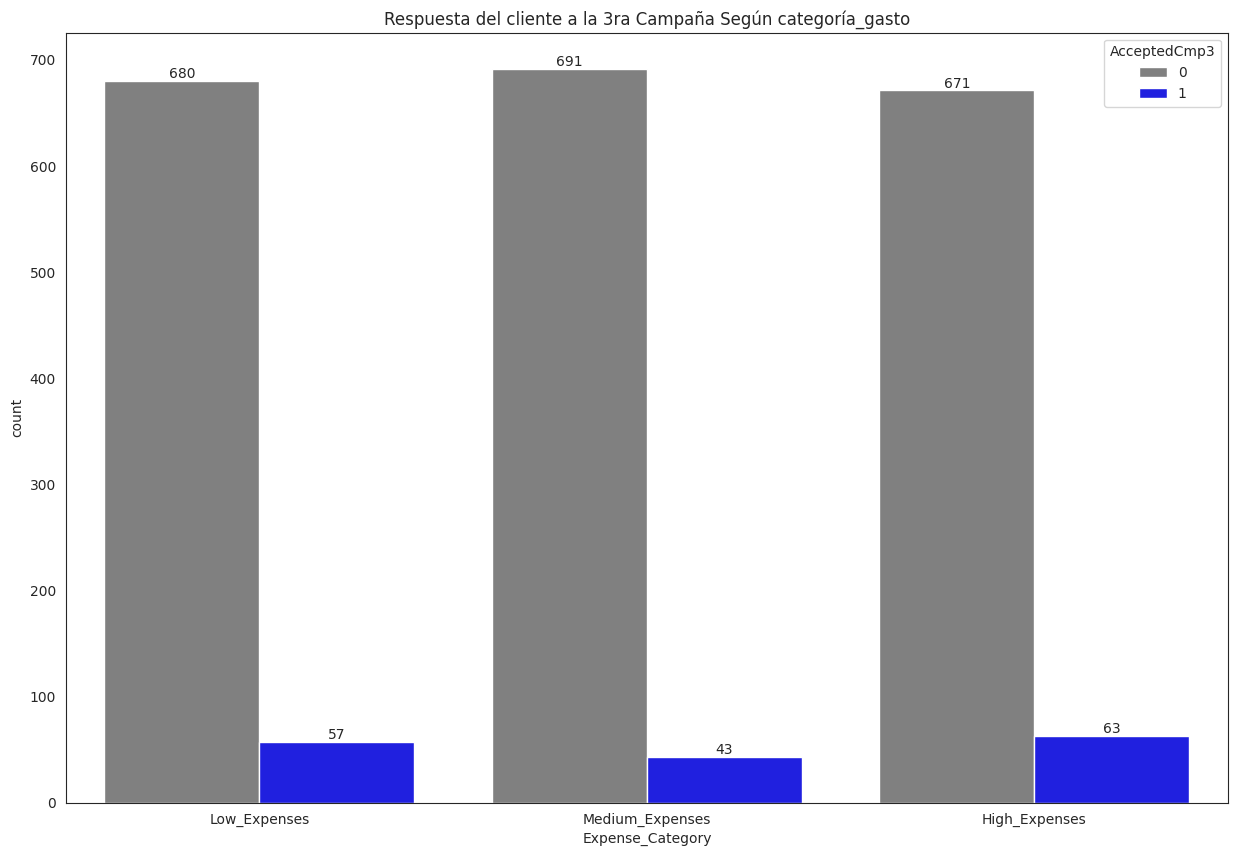

In [40]:
plt.figure(figsize=(15,10))
sns.set_style("white")
plt.title('Respuesta del cliente a la 3ra Campaña Según categoría_gasto')
ax = sns.countplot(x = data.Expense_Category, hue = data.AcceptedCmp3, palette=sns.blend_palette(['grey','blue','blue','blue'],4))
for i in ax.containers :
    plt.bar_label(i)
print(data.AcceptedCmp3.value_counts())
plt.savefig("Respuesta del cliente a la 3ra Campaña Según categoría_gasto.jpg", dpi=100, bbox_inches='tight')

0    2041
1     164
Name: AcceptedCmp4, dtype: int64


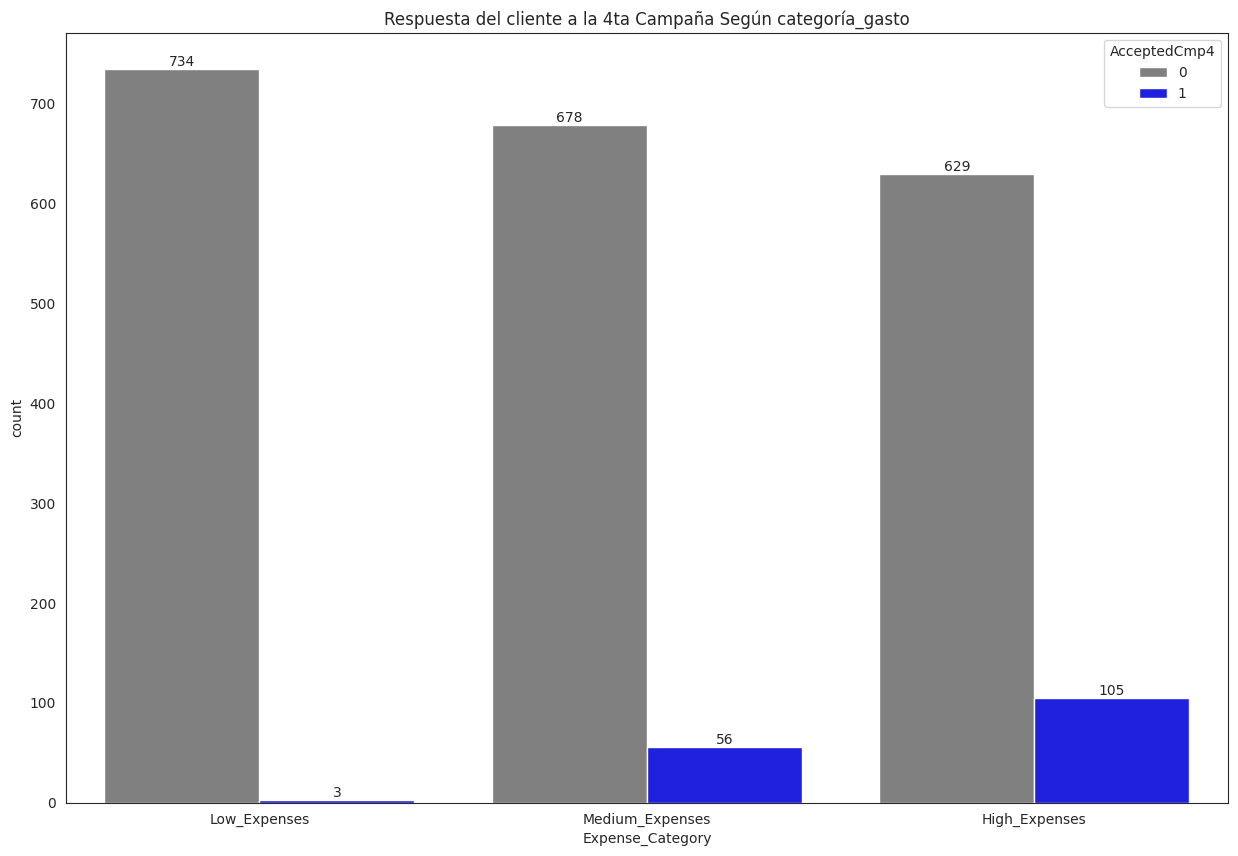

In [41]:
plt.figure(figsize=(15,10))
sns.set_style("white")
plt.title('Respuesta del cliente a la 4ta Campaña Según categoría_gasto')
ax = sns.countplot(x = data.Expense_Category, hue = data.AcceptedCmp4, palette=sns.blend_palette(['grey','blue','blue','blue'],4))
for i in ax.containers :
    plt.bar_label(i)
print(data.AcceptedCmp4.value_counts())
plt.savefig("Respuesta del cliente a la 4ta Campaña Según categoría_gasto.jpg", dpi=100, bbox_inches='tight')

0    2044
1     161
Name: AcceptedCmp5, dtype: int64


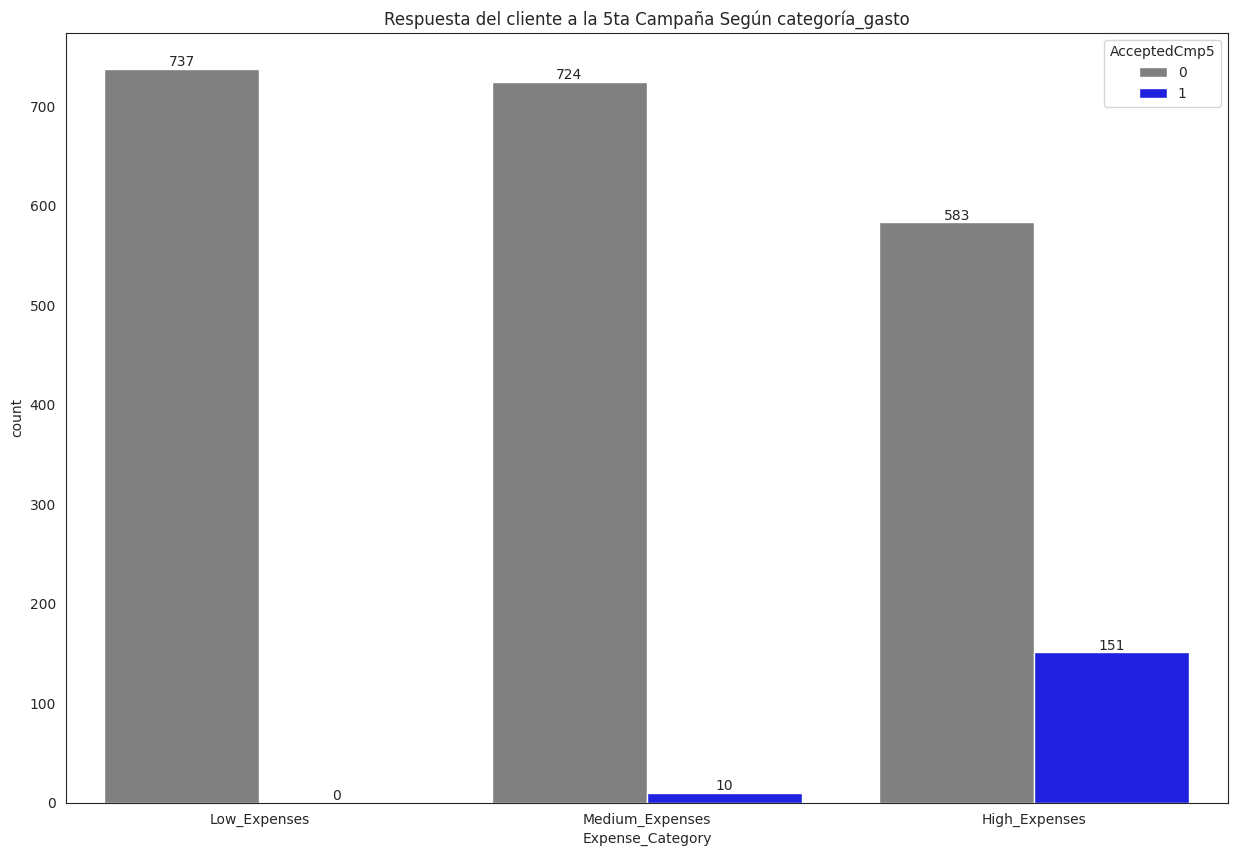

In [42]:
plt.figure(figsize=(15,10))
sns.set_style("white")
plt.title('Respuesta del cliente a la 5ta Campaña Según categoría_gasto')
ax = sns.countplot(x = data.Expense_Category, hue = data.AcceptedCmp5, palette=sns.blend_palette(['grey','blue','blue','blue'],4))
for i in ax.containers :
    plt.bar_label(i)
print(data.AcceptedCmp5.value_counts())
plt.savefig("Respuesta del cliente a la 5ta Campaña Según categoría_gasto.jpg", dpi=100, bbox_inches='tight')

# VEREMOS EL LA RELACIÓN ENTRE EL GASTO TOTAL EN RELACION AL CANAL DE COMPRA UTILIZADO

                 min         mean   max
NumWebPurchases                        
0                  4    61.857143  1729
1                  6    38.054913  1098
2                 19   230.525886  1958
3                 26   470.006006  2429
4                 39   788.706522  2244
5                149   922.986301  2158
6                224   824.666667  2304
7                263   902.948052  2491
8                384   883.725490  1949
9                347   963.840000  2304
10               502  1086.790698  2092
11               591  1131.590909  1959
23               125   125.000000   125
25                38    38.000000    38
27               274   274.000000   274


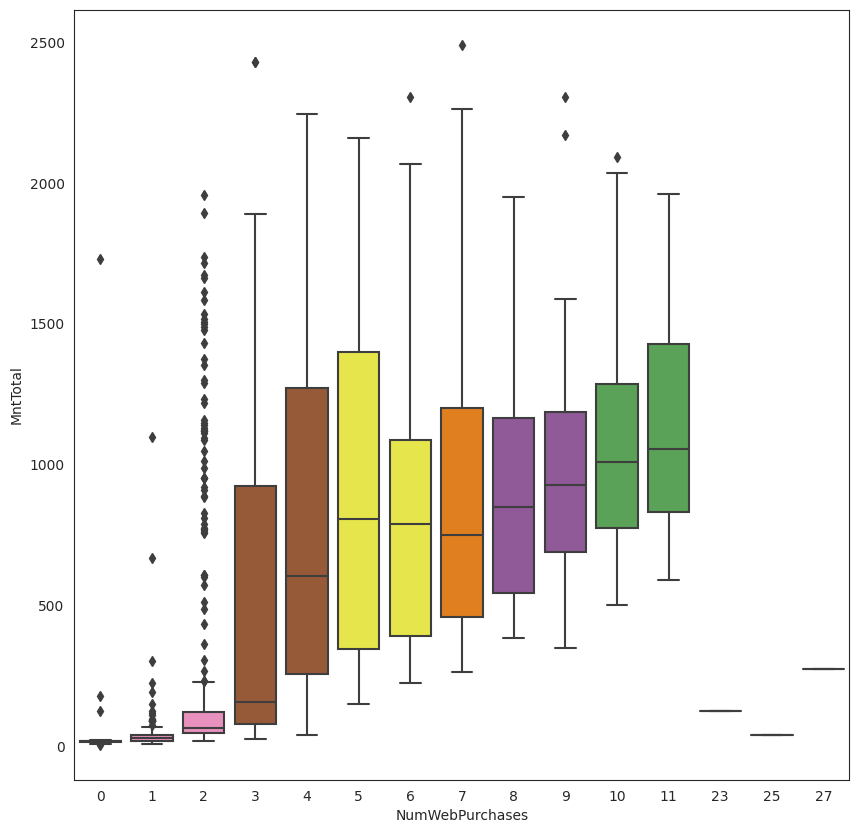

In [53]:
describ = data.groupby('NumWebPurchases')['MntTotal'].agg({'mean', 'min', 'max'})
print(describ)
plt.figure(figsize=(10,10))
sns.boxplot(x='NumWebPurchases', y='MntTotal', data=data, palette='Set1_r')
plt.show()

                   min         mean   max
NumStorePurchases                        
0                    4   230.400000  1729
1                  111   120.333333   125
2                    6    35.678899   224
3                    9    61.403727   770
4                   24   343.704403  1924
5                  116   714.113744  2188
6                  148   797.033898  2105
7                  225   836.007092  1966
8                  265   861.625850  2092
9                  300  1096.037736  2304
10                 445  1154.467742  2491
11                 577  1076.975000  2169
12                 485  1110.913462  2304
13                 432  1134.710843  1959


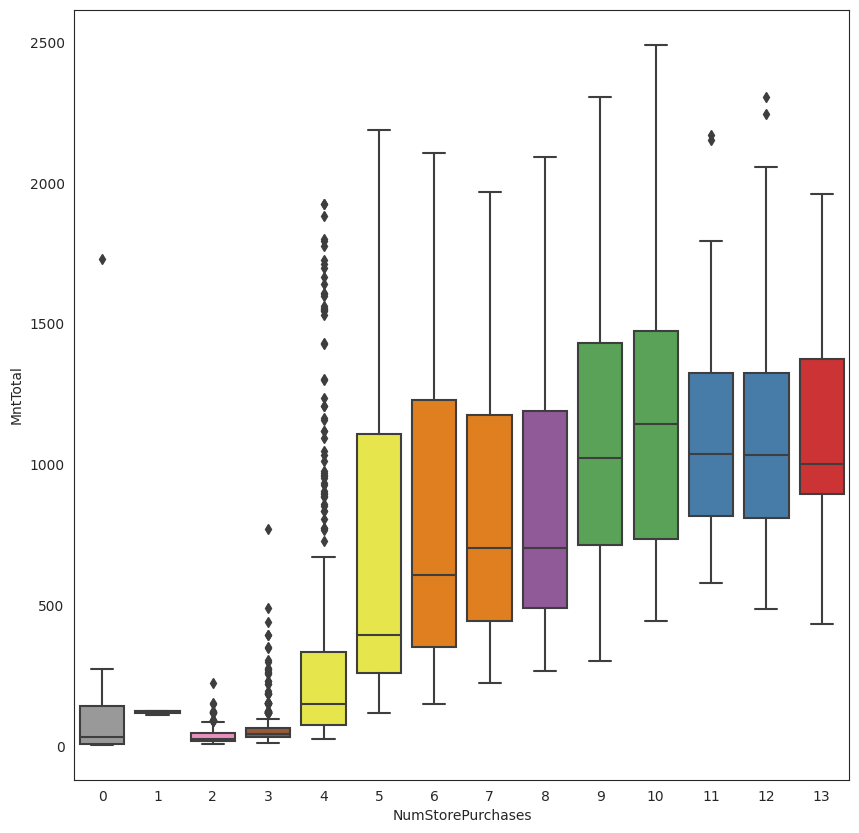

In [54]:
describ = data.groupby(['NumStorePurchases'])['MntTotal'].agg({'mean', 'min', 'max'})
print(describ)
plt.figure(figsize=(10,10))
sns.boxplot(x='NumStorePurchases', y='MntTotal', data=data, palette='Set1_r')
plt.show()

# Transformamos las columnas categóricas en Numéricas para favorecer la segmentación y futura predicción.

In [65]:
data['level_education'].replace(['Basic', '2nd_Cycle', 'Graduation', 'PhD', 'Master'], [1, 2, 3, 4, 5], inplace=True)
data['marital_status'].replace(['Single', 'Together', 'Married','Divorced', 'Widow'], [1,2,2,3,3], inplace=True)
data['Expense_Category'].replace(['Low_Expenses','Medium_Expenses','High_Expenses'], [1,2,3], inplace=True)

In [56]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,level_education,Expense_Category
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,63,2822,1529,1441,0,Single,Graduation,3
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,66,2272,21,15,0,Single,Graduation,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,55,2471,734,692,0,Together,Graduation,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,36,2298,48,43,0,Together,Graduation,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,39,2320,407,392,0,Married,PhD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,53,2540,1094,847,0,Married,Graduation,3
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,74,2178,436,428,1,Together,PhD,2
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,39,2314,1217,1193,1,Divorced,Graduation,3
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,64,2315,782,721,0,Together,Master,3


# Veamos las características con mayor varianza de nuestro conjunto de datos

In [74]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Create the features
features = data

# Create the variance threshold model
var_threshold = VarianceThreshold(threshold=9.5)

# Fit the variance threshold model
var_threshold.fit(features)

# Get the selected features
selected_features = features.columns[var_threshold.get_support()]

print(selected_features)

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumStorePurchases', 'Age', 'Customer_Days', 'MntTotal',
       'MntRegularProds'],
      dtype='object')


Elegiremos para la segmentación: las dos variables con mayor varianza (con respecto al comportamiento) y la oferta con mayor aceptación en la campaña.

In [84]:
datos = data[['MntWines','AcceptedCmp5','Recency']]

# Armamos el m,odelo kmeans

for n_clusters = 2, the silhouette coefficient is 0.6101088858362834
for n_clusters = 3, the silhouette coefficient is 0.5471422162389147
for n_clusters = 4, the silhouette coefficient is 0.5335171707829058
for n_clusters = 5, the silhouette coefficient is 0.5330843177763818
for n_clusters = 6, the silhouette coefficient is 0.5143942507299093
for n_clusters = 7, the silhouette coefficient is 0.5006472525745989
for n_clusters = 8, the silhouette coefficient is 0.5122176224747843
for n_clusters = 9, the silhouette coefficient is 0.5139988600151084
for n_clusters = 10, the silhouette coefficient is 0.512228399362588


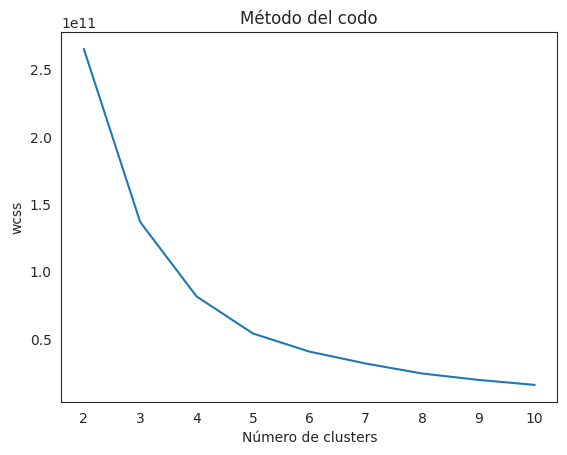

In [85]:
#KMEANS, Métodos del codo y de silueta
#data1 = data[['MntTotal', 'MntRegularProds','Recency']]
wcss= []

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10, random_state=5)
  pred = kmeans.fit_predict(data)
  silue_coef = silhouette_score(data, pred, metric='euclidean')
  print(f'for n_clusters = {n_cluster}, the silhouette coefficient is {silue_coef}')
  wcss.append(kmeans.inertia_)

#Método del codo
plt.plot(range(2,11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('wcss')
plt.show()

In [95]:
#Planteamos nuestro modelo con 3 clusters y lo hacemos clasificar
kmeans = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='k-means++')
pred = kmeans.fit_predict(datos)

In [96]:
#Cómo asigno los clientes a su clase?
print(pred)
data['prediction_clusters'] = pred

[2 0 2 ... 1 2 0]


In [97]:
data['prediction_clusters'].value_counts()

0    1293
2     603
1     309
Name: prediction_clusters, dtype: int64

In [98]:
data.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,level_education,Expense_Category,prediction_clusters
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,53,2540,1094,847,0,2,3,3,2
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,74,2178,436,428,1,2,4,2,2
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,39,2314,1217,1193,1,3,3,3,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,64,2315,782,721,0,2,5,3,2
2204,52869.0,1,1,40,84,3,61,2,1,21,...,1,66,2781,151,130,0,2,4,2,0


In [99]:
datos_agrupados = data.groupby('prediction_clusters').agg({'mean'})
datos_agrupados

<ipython-input-99-7961adf51584>:1: FutureWarning:

['Expense_Category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,level_education
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
prediction_clusters,,,,,,,,,,,,,,,,,,,,,
0,39310.962104,0.672080,0.490333,48.723125,71.222738,13.193349,60.894818,17.914927,12.479505,25.986852,...,0.004640,0.010828,0.105955,49.459397,2491.534416,175.705336,149.718484,0.103635,1.906419,3.311678
1,73967.650485,0.077670,0.404531,50.142395,967.828479,49.223301,378.110032,67.087379,49.055016,72.582524,...,0.067961,0.000000,0.355987,52.970874,2590.336570,1511.304207,1438.721683,1.071197,1.941748,3.734628
2,66569.885572,0.135987,0.593698,49.041459,470.883914,43.034826,280.165837,65.271973,47.303483,68.187396,...,0.004975,0.009950,0.142620,53.643449,2518.368159,906.660033,838.472637,0.323383,1.946932,3.444444


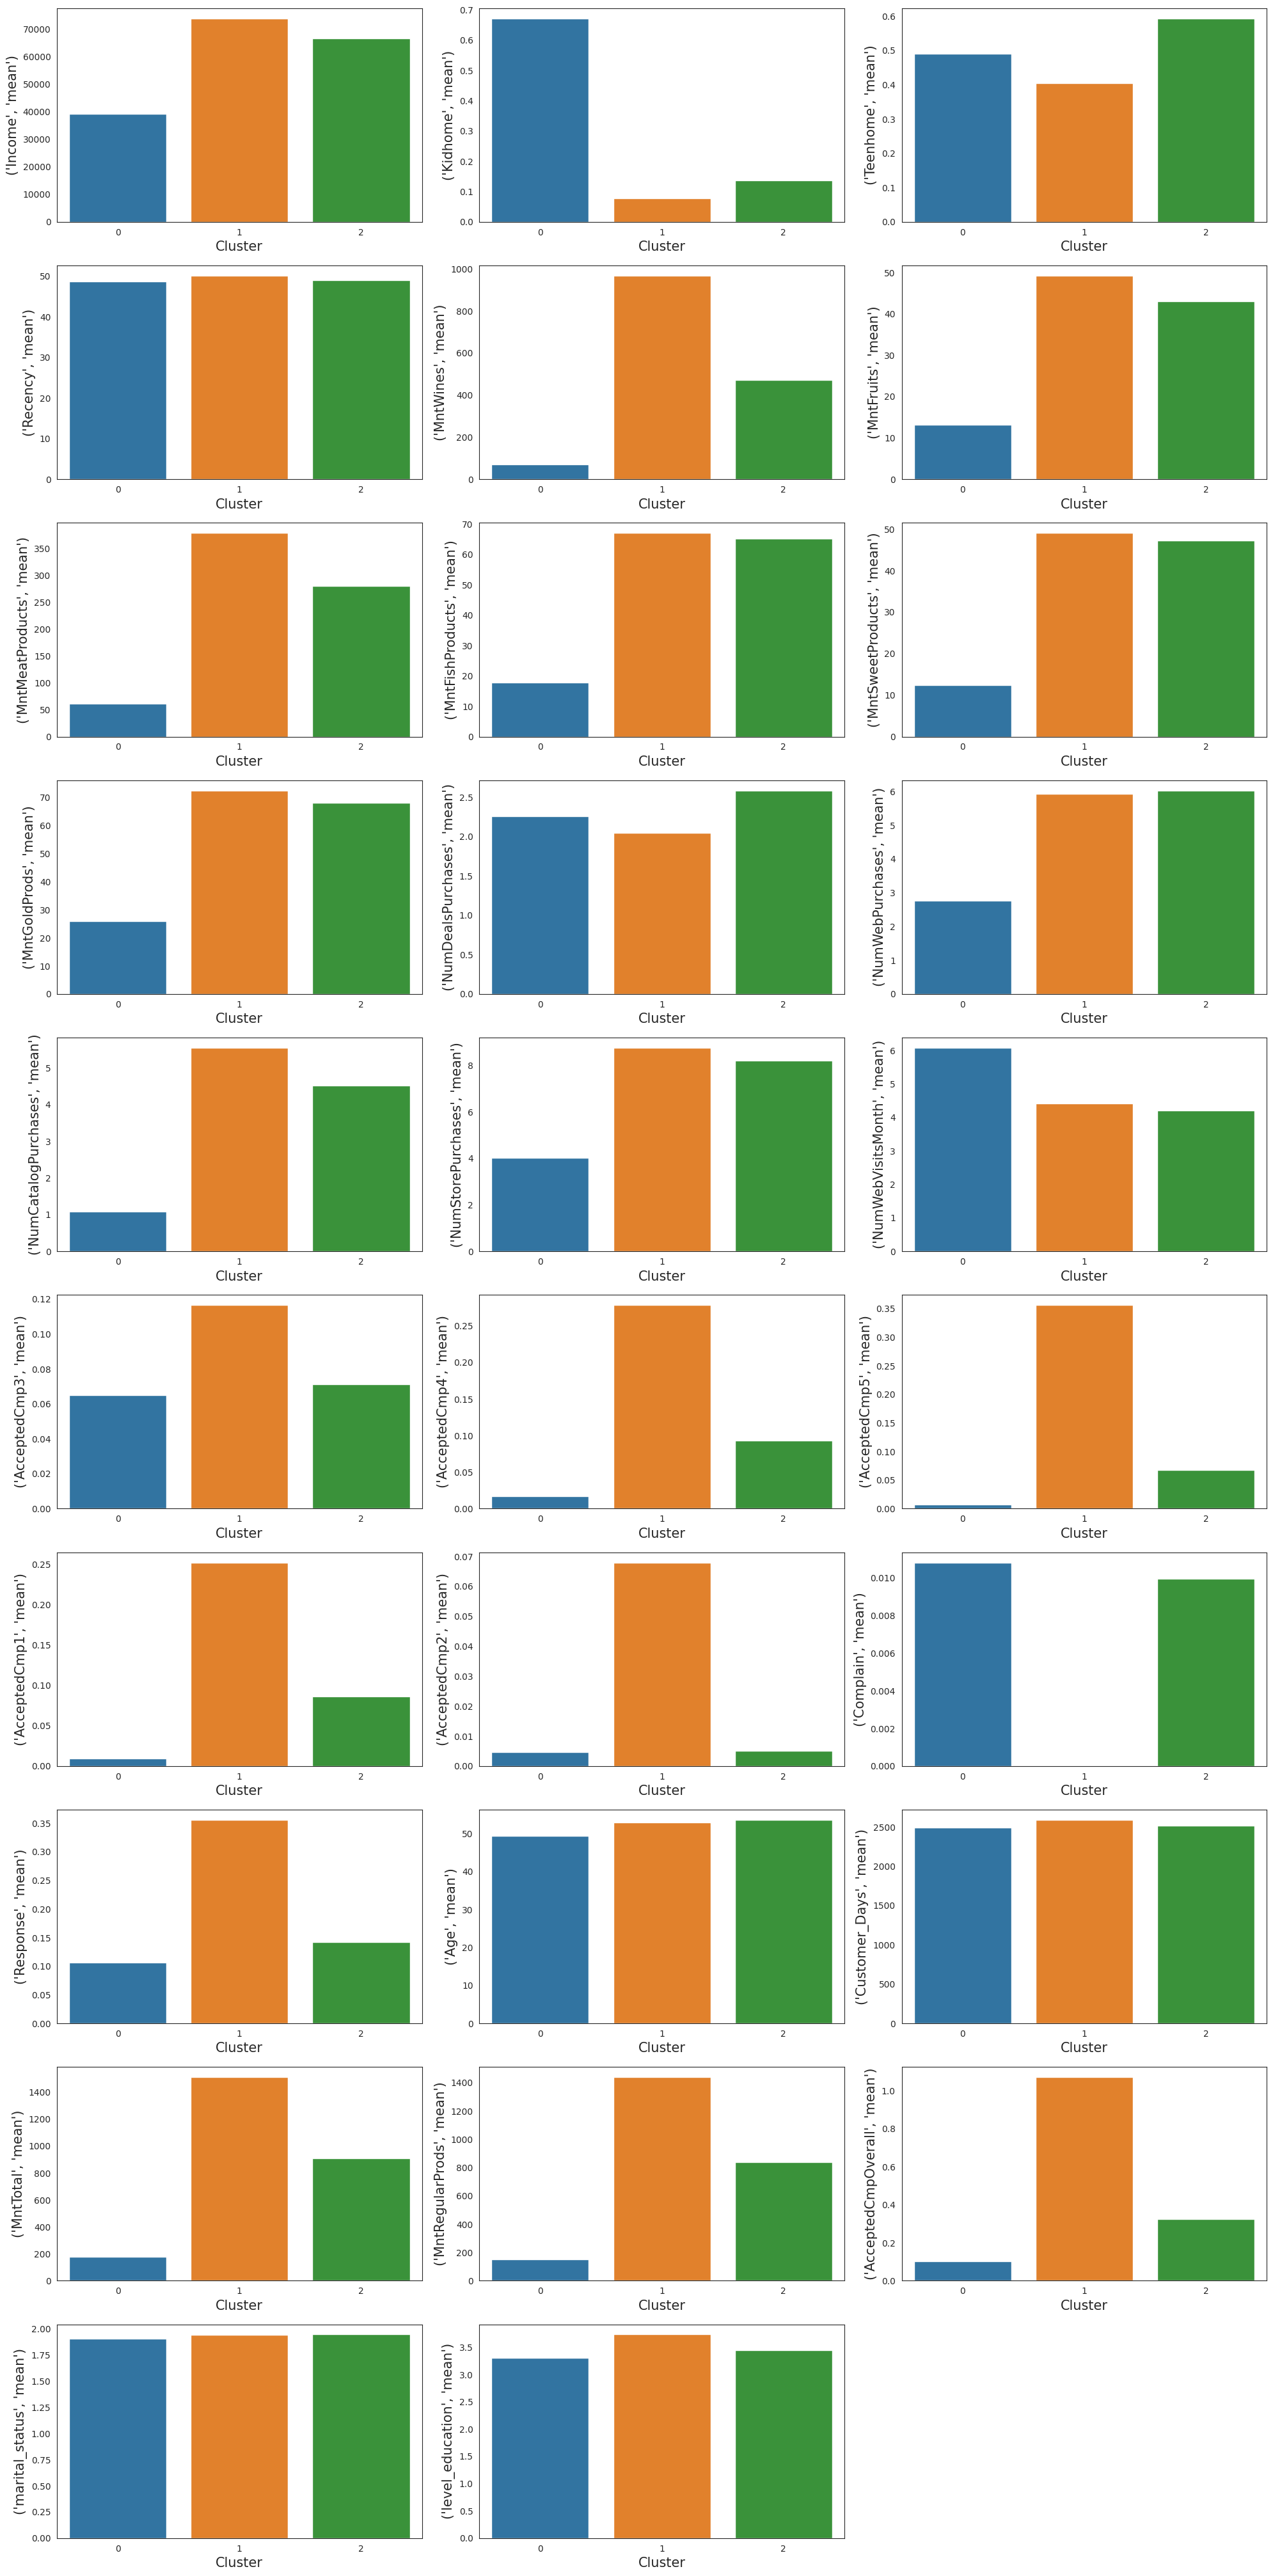

In [100]:
plt.figure(figsize=(20,60))
for i, var in enumerate(datos_agrupados.columns):
    plt.subplot(15,3,i+1)
    sns.barplot(x = datos_agrupados.reset_index().prediction_clusters, y = datos_agrupados[var])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()
plt.show()

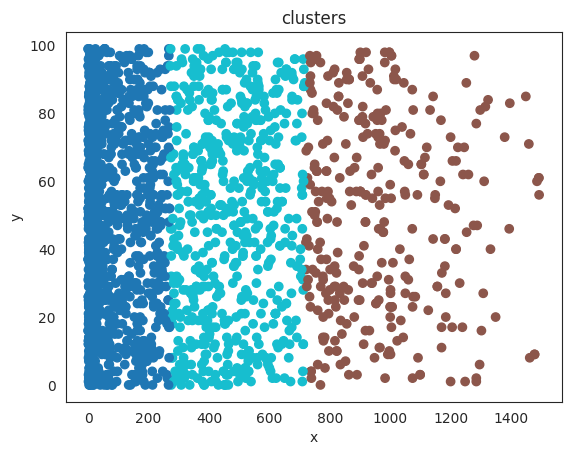

In [102]:
# Dibujamos los clusters en 2D
plt.scatter(datos['MntWines'], datos['Recency'], c=pred, cmap='tab10')
plt.title('clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Hasta acá hicimos la segmentación segun comportamiento de compra

0    1293
2     603
1     309
Name: prediction_clusters, dtype: int64


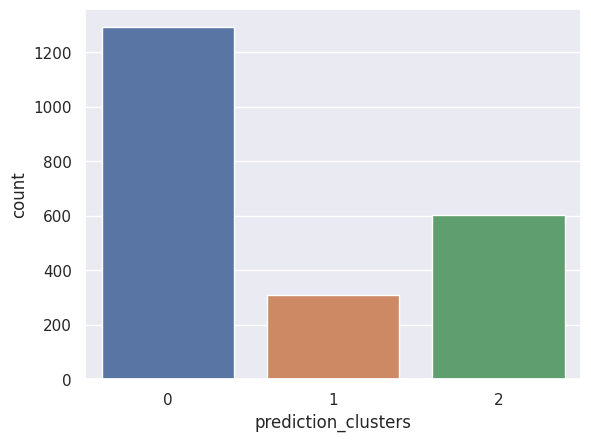

In [107]:
sns.set_theme(style="darkgrid")
sns.countplot(x="prediction_clusters", data=data)
print(data.prediction_clusters.value_counts())
plt.show()

# Separamos los grupos para que cada uno sea un conjunto de datos independiente

In [108]:
clusters = data['prediction_clusters']
cluster_0 = data[clusters == 0]
cluster_1 = data[clusters == 1]
cluster_2 = data[clusters == 2]

In [109]:
cluster_0.head()
cluster_1.head()
cluster_2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,level_education,Expense_Category,prediction_clusters
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,63,2822,1529,1441,0,1,3,3,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,55,2471,734,692,0,2,3,2,2
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,53,2452,702,688,0,2,5,2,2
22,65324.0,0,1,0,384,0,102,21,32,5,...,0,66,2328,539,534,0,2,4,2,2
27,84618.0,0,0,96,684,100,801,21,66,0,...,0,55,2378,1672,1672,1,2,4,3,2


# Guardamos el conjunto de datos nuevo como 'datos_delivery_comidas.csv' y cada cluster por separado

In [110]:
data.to_csv('datos_delivery_comidas.csv')
cluster_0.to_csv('cluster_0.csv')
cluster_1.to_csv('cluster_1.csv')
cluster_2.to_csv('cluster_2.csv')

# Creamos una columna para cada oferta de descuento. Ofertas 'ALFA' y 'BETA'.

# OFERTA ALFA = 50% DE DESCUENTO EN 2DA UNIDAD EN VINOS Y CORTES SELECCIONADOS DE CARNES
# OFERTA BETA = 30% DE DESCUENTO EN COMPRAS DESDE EL SITIO WEB Y 20% DE DESCUENTO EN COMPRAS POR CATALOGO Y TIENDA.

In [111]:
#Creamos una columna para las oferta de descuento
#1= ALFA
#2= BETA

data['offer'] = ''
#Iteramos a través de las filas del dataset
for _,row in data.iterrows():
    # Si el cliente ha gastado más de 500 $ en vino,
    # le ofrecemos un descuento del 50% en la segunda unidad de vino, y descuento en cortes de carne.
    if row ['MntTotal'] >= 400 and row['MntWines'] >= 400 and row['MntRegularProds'] >= 300:
         data.loc[row.name,'offer'] = '1'
    # En caso contrario:
    #le ofrecemos 25% de descuento en compras por sitio web y 20% de descuento en compras en tienda
    else:
        data.loc[row.name,'offer'] = '2'

In [114]:
clusters = data['prediction_clusters']
cluster_0 = data[clusters == 0]
cluster_1 = data[clusters == 1]
cluster_2=data[clusters == 2]

# VEREMOS CUANTOS CLIENTES DE CADA CLUSTER SON APTOS PARA RECIBIR LAS OFERTAS DE PRODUCTOS 'ALFA' O 'BETA'.
# 1 PARA ALFA
# 2 PARA BETA

In [115]:
cluster_0['offer'].value_counts()

2    1293
Name: offer, dtype: int64

In [116]:
cluster_1['offer'].value_counts()

1    309
Name: offer, dtype: int64

In [117]:
cluster_2['offer'].value_counts()

1    387
2    216
Name: offer, dtype: int64

# cluster 2 gastos medios

# Oferta ALFA

In [142]:
cluster2A = cluster_2[cluster_2['offer']=='1']
cluster2B = cluster_2[cluster_2['offer']== '2']
print(cluster2A.shape)
print(cluster2B.shape)

(387, 32)
(216, 32)


In [150]:
x_2A = cluster2A.drop('Response', axis=1)
y_2A = cluster2A['Response']
#y=y.astype('int')
x_train_2A, x_test_2A, y_train_2A, y_test_2A = train_test_split(x_2A, y_2A, test_size=0.40, random_state=42)

accuracy: 0.8046875
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       108
           1       0.35      0.30      0.32        20

    accuracy                           0.80       128
   macro avg       0.61      0.60      0.61       128
weighted avg       0.79      0.80      0.80       128



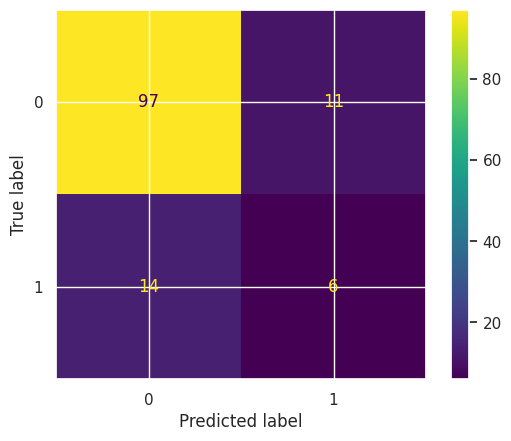

In [125]:
#ARBOL DE DECISION CLUSTER 2 OFERTA ALFA
modelo_arbol2A = DecisionTreeClassifier(max_depth=5, random_state=42).fit(x_train_2A, y_train_2A)
y_pred_arbol2A = modelo_arbol2A.predict(x_test_2A)

cm = confusion_matrix(y_test_2A, y_pred_arbol2A)
ConfusionMatrixDisplay(cm).plot()

print(f'accuracy: {accuracy_score(y_test_2A, y_pred_arbol2A)}')

from sklearn.metrics import classification_report
print(classification_report(y_test_2A, y_pred_arbol2A))

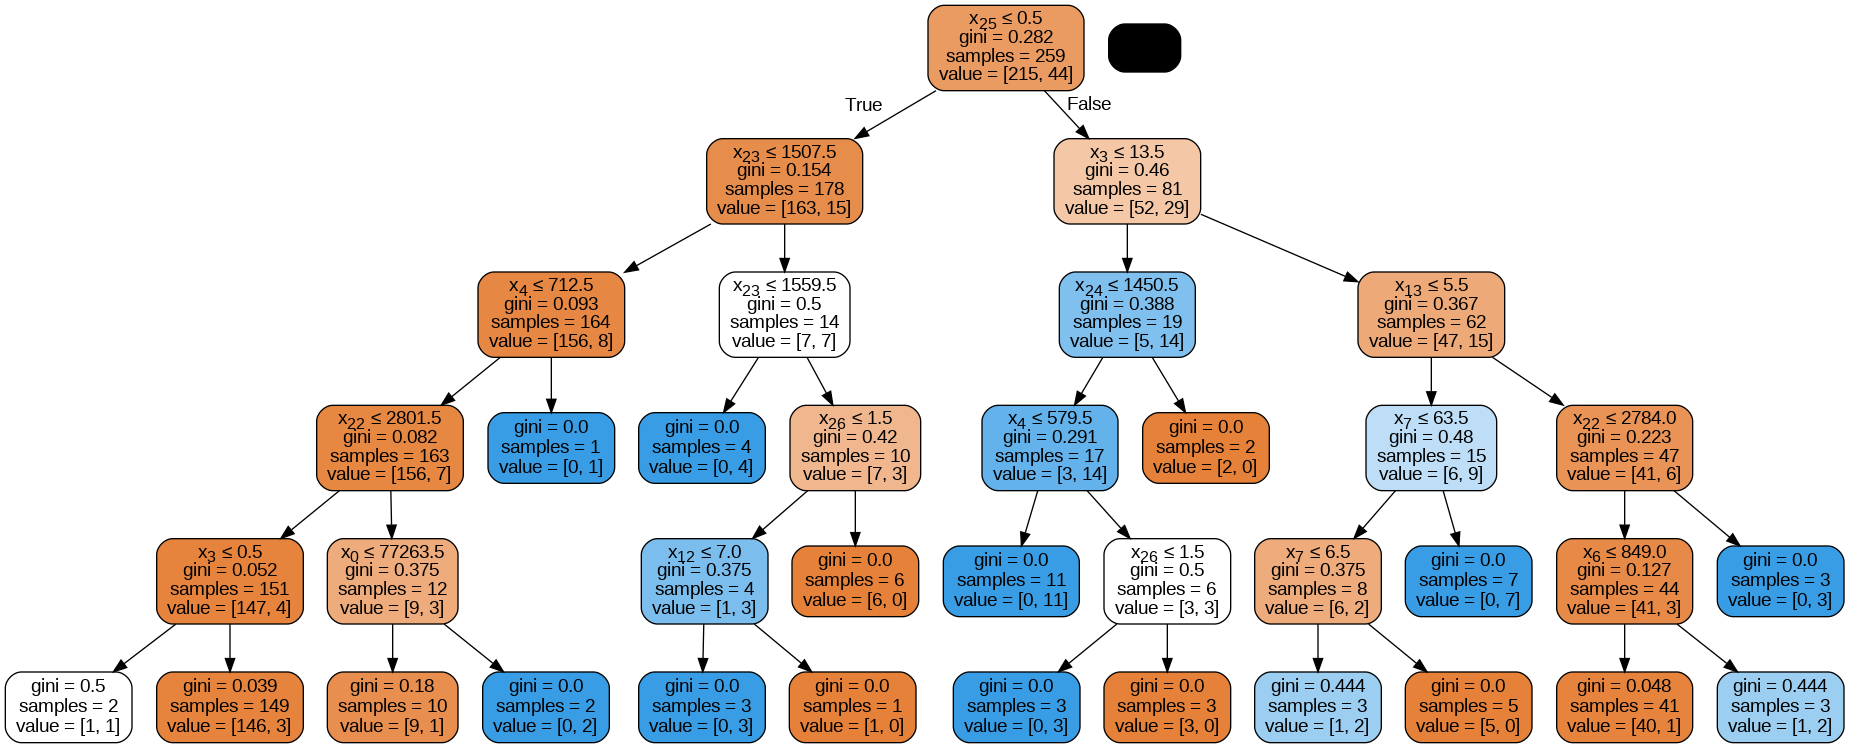

In [204]:
dot_data = StringIO()
export_graphviz(modelo_arbol2A , out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

accuracy: 0.8903225806451613
recall: 0.4166666666666667
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       131
           1       0.77      0.42      0.54        24

    accuracy                           0.89       155
   macro avg       0.84      0.70      0.74       155
weighted avg       0.88      0.89      0.88       155



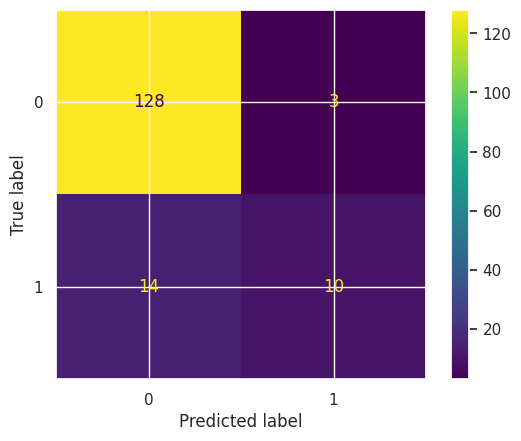

In [153]:
#RANDOM FOREST CLUSTER 2 OFERTA ALFA
modelo_forest2A = RandomForestClassifier(n_estimators=1400, max_depth=8, criterion='gini', max_features=None). fit(x_train_2A, y_train_2A)
y_pred_forest2A = modelo_forest2A.predict(x_test_2A)
cm = confusion_matrix(y_test_2A, y_pred_forest2A)
ConfusionMatrixDisplay(cm).plot()
print(f'accuracy: {accuracy_score(y_test_2A, y_pred_forest2A)}')
print(f'recall: {recall_score(y_test_2A, y_pred_forest2A)}')
print(classification_report(y_test_2A, y_pred_forest2A))

# Oferta BETA

In [139]:
x_2B= cluster2B.drop('Response', axis=1)
y_2B= cluster2B['Response']
#y=y.astype('int')
x_train_2B,x_test_2B,y_train_2B,y_test_2B= train_test_split(x_2B,y_2B,test_size=0.33,random_state=42)

accuracy: 0.8888888888888888
recall: 0.125
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        64
           1       0.50      0.12      0.20         8

    accuracy                           0.89        72
   macro avg       0.70      0.55      0.57        72
weighted avg       0.86      0.89      0.86        72



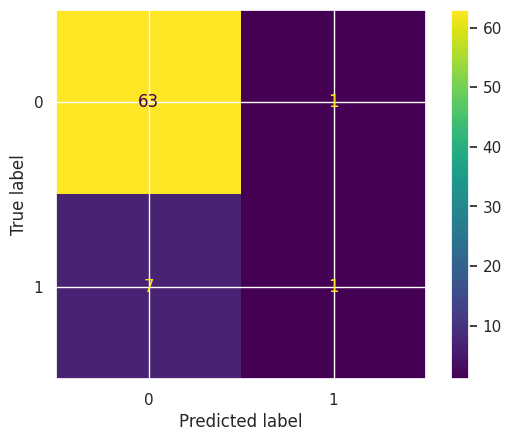

In [140]:
#Modelo Forest cluster 2 oferta beta
modelo_forest2B = RandomForestClassifier(criterion='gini', max_depth=10
                                         , max_features=None,n_estimators=800). fit(x_train_2B, y_train_2B)
y_pred_forest2B = modelo_forest2B.predict(x_test_2B)
cm = confusion_matrix(y_test_2B, y_pred_forest2B)
ConfusionMatrixDisplay(cm).plot()
print(f'accuracy: {accuracy_score(y_test_2B, y_pred_forest2B)}')
print(f'recall: {recall_score(y_test_2B, y_pred_forest2B)}')
print(classification_report(y_test_2B, y_pred_forest2B))

0.8472222222222222
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.29      0.25      0.27         8

    accuracy                           0.85        72
   macro avg       0.60      0.59      0.59        72
weighted avg       0.84      0.85      0.84        72



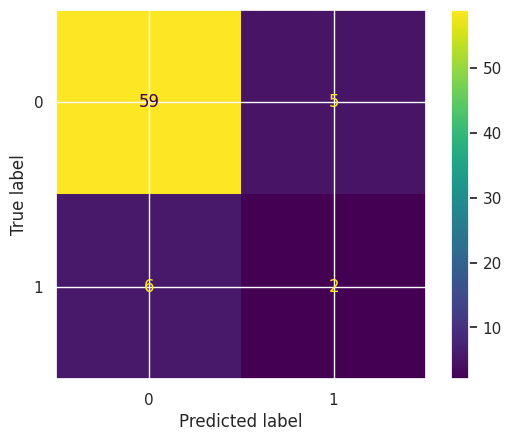

In [141]:
#MODELO ARBOL DE DECISION CLUSTER 2 OFERTA BETA
modelo_arbol2B = DecisionTreeClassifier(max_depth=4, random_state=42).fit(x_train_2B, y_train_2B)
y_pred_arbol2B = modelo_arbol2B.predict(x_test_2B)

cm = confusion_matrix(y_test_2B, y_pred_arbol2B)
ConfusionMatrixDisplay(cm).plot()

print(accuracy_score(y_test_2B, y_pred_arbol2B))

from sklearn.metrics import classification_report
print(classification_report(y_test_2B, y_pred_arbol2B))

# Cluster 1: gastos altos

# Oferta ALFA

In [154]:
cluster1A = cluster_1[cluster_1['offer']=='1']
cluster1B = cluster_1[cluster_1['offer']== '2']
print(cluster1A.shape)
print(cluster1B.shape)

(309, 32)
(0, 32)


In [155]:
x_1A= cluster_1.drop('Response', axis=1)
y_1A= cluster_1['Response']
#y=y.astype('int')
x_train_1A,x_test_1A,y_train_1A,y_test_1A= train_test_split(x_1A,y_1A,test_size=0.35, random_state=42)

0.7064220183486238
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        70
           1       0.60      0.54      0.57        39

    accuracy                           0.71       109
   macro avg       0.68      0.67      0.67       109
weighted avg       0.70      0.71      0.70       109



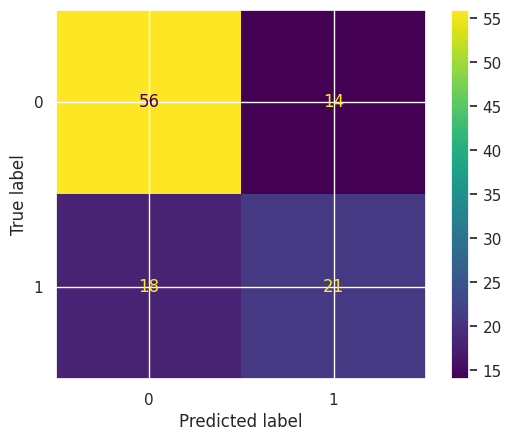

In [157]:
#MODELOS ARBOL DE CLASIFICACIÓN CLUSTER 1 OFERTA ALFA
modelo_arbol1A = DecisionTreeClassifier(max_depth=5, random_state=42).fit(x_train_1A, y_train_1A)
y_pred_arbol1A = modelo_arbol1A.predict(x_test_1A)

cm = confusion_matrix(y_test_1A, y_pred_arbol1A)
ConfusionMatrixDisplay(cm).plot()

print(accuracy_score(y_test_1A, y_pred_arbol1A))

from sklearn.metrics import classification_report
print(classification_report(y_test_1A, y_pred_arbol1A))

0.7339449541284404
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        70
           1       0.65      0.56      0.60        39

    accuracy                           0.73       109
   macro avg       0.71      0.70      0.70       109
weighted avg       0.73      0.73      0.73       109



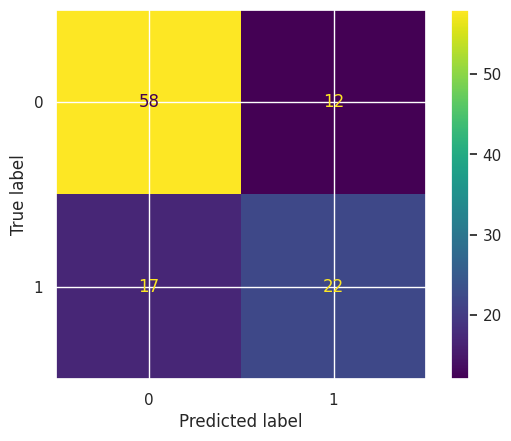

In [158]:
#MODELO RANDOM FOREST CLUSTER 1 OFERTA ALFA
#modelo_forest1A = RandomForestClassifier(n_estimators=400, max_depth=15, criterion='gini', max_features='log2'). fit(x_train_1A, y_train_1A)
modelo_forest1A = RandomForestClassifier(n_estimators=800, max_depth=20, criterion='gini', max_features=None). fit(x_train_1A, y_train_1A)
y_pred_forest1A = modelo_forest1A.predict(x_test_1A)

cm = confusion_matrix(y_test_1A, y_pred_forest1A)

ConfusionMatrixDisplay(cm).plot()
print(accuracy_score(y_test_1A, y_pred_forest1A))

print(classification_report(y_test_1A, y_pred_forest1A))

# cluster 0 : gastos bajos

# Oferta BETA

In [160]:
cluster0A = cluster_0[cluster_0['offer']=='1']
cluster0B = cluster_0[cluster_0['offer']== '2']
print(cluster0A.shape)
print(cluster0B.shape)

(0, 32)
(1293, 32)


In [161]:
x_0B= cluster0B.drop('Response', axis=1)
y_0B= cluster0B['Response']
#y=y_1B.astype('int')
x_train_0B,x_test_0B,y_train_0B,y_test_0B= train_test_split(x_0B,y_0B,test_size=0.36, random_state=42)

0.9098712446351931
0.32
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       416
           1       0.67      0.32      0.43        50

    accuracy                           0.91       466
   macro avg       0.79      0.65      0.69       466
weighted avg       0.90      0.91      0.90       466



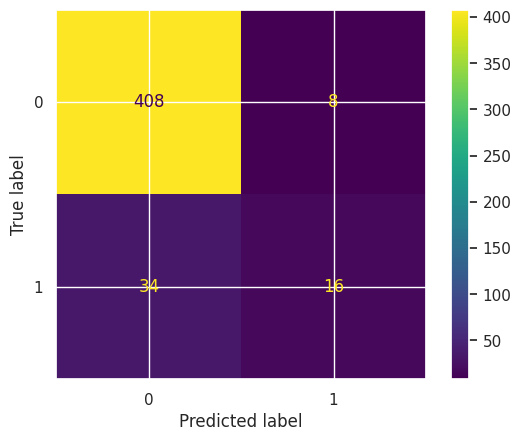

In [162]:
# MODELO FOREST CLUSTER 0 OFERTA BETA
modelo_forest0B = RandomForestClassifier(n_estimators=400, max_depth=20, criterion='gini', max_features=None). fit(x_train_0B, y_train_0B)

y_pred_forest0B = modelo_forest0B.predict(x_test_0B)

cm = confusion_matrix(y_test_0B, y_pred_forest0B)
ConfusionMatrixDisplay(cm).plot()
print(accuracy_score(y_test_0B, y_pred_forest0B))
print(recall_score(y_test_0B, y_pred_forest0B))
print(classification_report(y_test_0B, y_pred_forest0B))

accuracy: 0.8755364806866953
recall: 0.34
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       416
           1       0.40      0.34      0.37        50

    accuracy                           0.88       466
   macro avg       0.66      0.64      0.65       466
weighted avg       0.87      0.88      0.87       466



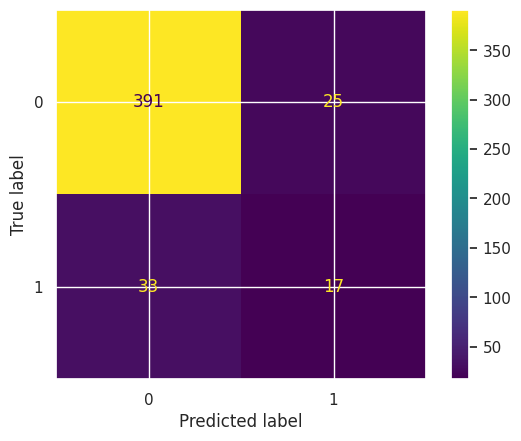

In [163]:
#ARBOL DE DECIISON CLUSTER 0 OFERTA BETA
modelo_arbol0B = DecisionTreeClassifier(max_depth=18, random_state=42).fit(x_train_0B, y_train_0B)
y_pred_arbol0B = modelo_arbol0B.predict(x_test_0B)

cm = confusion_matrix(y_test_0B, y_pred_arbol0B)
ConfusionMatrixDisplay(cm).plot()

print(f'accuracy: {accuracy_score(y_test_0B, y_pred_arbol0B)}')
print(f'recall: {recall_score(y_test_0B, y_pred_arbol0B)}')
from sklearn.metrics import classification_report
print(classification_report(y_test_0B, y_pred_arbol0B))

# Y SI AHORA HACEMOS LA CLASIFICACION DE CLIENTES SIN CLUSTERS, SOLO CON OFERTA ALFA Y BETA?

# OFERTA BETA

In [164]:
ofertas = data['offer']
oferta_alfa = data[ofertas == '1']
oferta_beta = data[ofertas == '2']

In [ ]:
oferta_beta.drop(oferta_beta[['AcceptedCmpOverall', 'Complain', 'marital_status', 'level_education', 'prediction_clusters','Expense_Category']], axis=1, inplace=True)
oferta_alfa.drop(oferta_alfa[['AcceptedCmpOverall', 'Complain', 'marital_status', 'level_education', 'prediction_clusters','Expense_Category']], axis=1, inplace=True)

In [166]:
#OFERTA BETA

x_B= oferta_beta.drop('Response', axis=1)
y_B= oferta_beta['Response']
#y=y_1B.astype('int')
x_train_B,x_test_B,y_train_B,y_test_B= train_test_split(x_B,y_B,test_size=0.25, random_state=42)

0.9153439153439153
0.38461538461538464
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       339
           1       0.65      0.38      0.48        39

    accuracy                           0.92       378
   macro avg       0.79      0.68      0.72       378
weighted avg       0.90      0.92      0.91       378



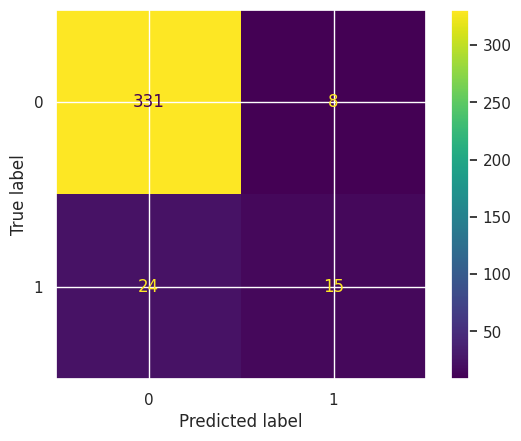

In [167]:
#MODELOS RANDOM FOREST OFERTA BETA
modelo_forestB = RandomForestClassifier(n_estimators=1000, max_depth=10, criterion='gini', max_features=None). fit(x_train_B, y_train_B)

y_pred_forestB = modelo_forestB.predict(x_test_B)

cm = confusion_matrix(y_test_B, y_pred_forestB)
ConfusionMatrixDisplay(cm).plot()
print(accuracy_score(y_test_B, y_pred_forestB))
print(recall_score(y_test_B, y_pred_forestB))
print(classification_report(y_test_B, y_pred_forestB))

accuracy: 0.8650793650793651
recall: 0.41025641025641024
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       339
           1       0.36      0.41      0.39        39

    accuracy                           0.87       378
   macro avg       0.65      0.66      0.65       378
weighted avg       0.87      0.87      0.87       378



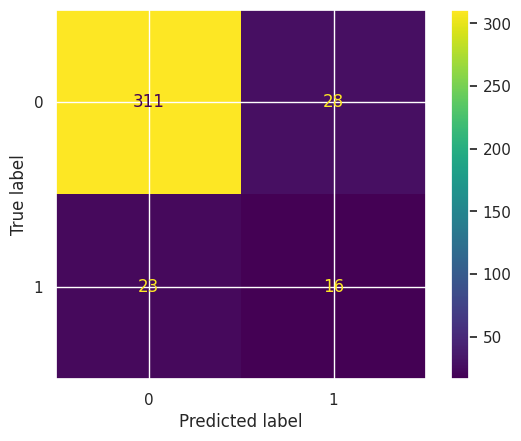

In [168]:
#ARBOL DE DECISION OFERTA BETA
modelo_arbolB = DecisionTreeClassifier(max_depth=10, random_state=42).fit(x_train_B, y_train_B)
y_pred_arbolB = modelo_arbolB.predict(x_test_B)

cm = confusion_matrix(y_test_B, y_pred_arbolB)
ConfusionMatrixDisplay(cm).plot()

print(f'accuracy: {accuracy_score(y_test_B, y_pred_arbolB)}')
print(f'recall: {recall_score(y_test_B, y_pred_arbolB)}')
from sklearn.metrics import classification_report
print(classification_report(y_test_B, y_pred_arbolB))

# OFERTA ALFA

In [201]:
x_A= oferta_alfa.drop('Response', axis=1)
y_A= oferta_alfa['Response']
#y=y_1B.astype('int')
x_train_A,x_test_A,y_train_A,y_test_A= train_test_split(x_A,y_A,test_size=0.3, random_state=42)

0.8325358851674641
0.4897959183673469
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       160
           1       0.71      0.49      0.58        49

    accuracy                           0.83       209
   macro avg       0.78      0.71      0.74       209
weighted avg       0.82      0.83      0.82       209



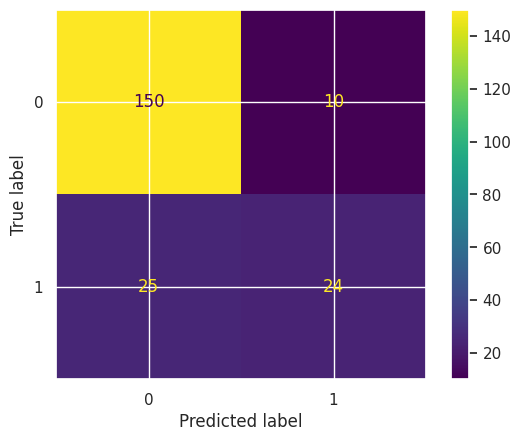

In [202]:
#MODELO RANDOM FOREST OFERTA ALFA
modelo_forestA = RandomForestClassifier(n_estimators=1000, max_depth=12, criterion='gini', max_features=None). fit(x_train_A, y_train_A)

y_pred_forestA = modelo_forestA.predict(x_test_A)

cm = confusion_matrix(y_test_A, y_pred_forestA)
ConfusionMatrixDisplay(cm).plot()
print(accuracy_score(y_test_A, y_pred_forestA))
print(recall_score(y_test_A, y_pred_forestA))
print(classification_report(y_test_A, y_pred_forestA))

accuracy: 0.8038277511961722
recall: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       160
           1       0.58      0.57      0.58        49

    accuracy                           0.80       209
   macro avg       0.73      0.72      0.72       209
weighted avg       0.80      0.80      0.80       209



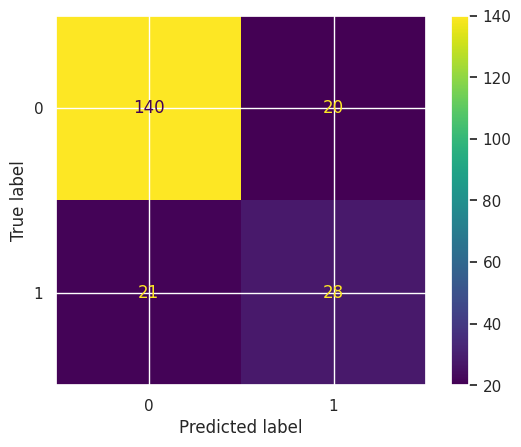

In [203]:
#ARBOL DE DECISION OFERTA ALFA
modelo_arbolA = DecisionTreeClassifier(max_depth=6, random_state=42).fit(x_train_A, y_train_A)
y_pred_arbolA = modelo_arbolA.predict(x_test_A)

cm = confusion_matrix(y_test_A, y_pred_arbolA)
ConfusionMatrixDisplay(cm).plot()

print(f'accuracy: {accuracy_score(y_test_A, y_pred_arbolA)}')
print(f'recall: {recall_score(y_test_A, y_pred_arbolA)}')
from sklearn.metrics import classification_report
print(classification_report(y_test_A, y_pred_arbolA))

# CLUSTER 1 M´PAS GASTOS EN PRODUCTOS REGULARES (QUE NO SON PARTE DE LAS OFERTAS DE CAMPAÑA) Y EN VINOS.
#CLUSTER 0 Y 2 SON LOS QUE MENOS COMPRAN PERO COMPRAN MÁS EN OFERTA Y REVISAN LA PAGINA WEB MAS QUE CLUSTER 1.

Exactitud (accuracy) = fracción de casos clasificados correctamente. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precisión (presicion)= Fracción de positivos predichos que fueron realmente positivos Precision = TP / (TP + FP)

Recuerdo (Recall)= Fracción de positivos reales que se identificaron correctamente como positivos Recall = TP / (TP + FN)

TN | FP

FN | TP

In [ ]:
#TEST DE HIPOTESIS (LUEGO)
#HIPOTESIS NULA = EL PROMEDIO DE EXITO DE AMBAS OFERTAS ES IGUAL  (EN CADA CLUSTER)
#HIPOTESIS ALTERNATIVA = EL PROMEDIO DE AMBAS OFERTAS NO ES IGUAL  (EN CADA CLUSTER)

#EL NIVEL DE CONFIANZA LO HAGO AL ELEGIR UNA MUESTRA DEL DATASET ORIGINAL Y CALCULAR SU EXITO
#POR EJEMPLO: DE 100 CLIENTES DE UN CLUSTER, CUANTOS RESPONDIERON QUE SI Y CUANTOS RESPONDIERON QUE NO?

#RECORDEMOS QUE LA CAMPAÑA TUVO UN EXITO DEL 15% DE VENTAS.

Las pruebas A/B son un método para comparar dos versiones diferentes de una oferta para ver cuál funciona mejor.

#Ahora realizaremos la prueba de hipotesis a cada cluster
#En relacion a cada oferta. A/B Testing

In [ ]:
# VOY A CALCULAR LA TASA DE CONVERSIÓN PARA CADA GRUPO (OFERTA ALFA CLUSTER 2, OFERTA BETA CLUSTER 2)
# Y ASI CON CADA GRUPO (OFERTA Y CLUSTER)

In [205]:
from scipy.stats import stats

In [208]:
alpha_df = data[data['offer']=='1']
beta_df = data[data['offer']=='2']

alpha_convertion_rate = alpha_df['Response'].mean()
beta_convertion_rate = beta_df['Response'].mean()

In [209]:
alpha_convertion_rate

0.25

In [210]:
beta_convertion_rate

0.10536779324055666

In [ ]:
# AHORA REALIZARE UNA PRUEBA DE HIPOTESIS PARA DETERMINAR SI EXISTE UNA DIFERENCIA ESTADÍSTICAMENTE SIGNIFICATIVA
# ENTRE LAS DOS TASAS DE CONVERSIÓN.

In [213]:
stats.ttest_ind(alpha_df['Response'], beta_df['Response'], equal_var=False)

<ipython-input-213-f1921cc64cea>:1: DeprecationWarning:

Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



Ttest_indResult(statistic=7.934206546829536, pvalue=5.504049602362606e-15)

#EL RESULTADO DE LA PRUEBA DE HIPOTESIS SERÁ UN VALOR P.
#SI EL VALOR P ES MENOR AL NIVEL DE SIGNIFICACIÓN (NORMALMENTE 0,05), PODEMOS RECHAZAR LA HIPOTESIS NULA
#Y CONCLUIR QUE EXISTE UNA DIFERENCIA ESTADÍSTICAMENTE SIGNIFICATIVA ENTRE LAS DOS TASAS DE CONVERSIÓN.

# Ahora los veremos con cada cluster 2 (EL CUAL FUE EL UNICO GRUPO EN EL QUE SE PUEDO OFERTAR PRODUCTOS 'ALFA' Y 'BETA')



In [216]:
stats.ttest_ind(cluster2A['Response'], cluster2B['Response'], equal_var=False)

<ipython-input-216-5c56b60c9af9>:1: DeprecationWarning:

Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



Ttest_indResult(statistic=2.2700345442652456, pvalue=0.023611868069375857)

# QUE CONTRIBUCION ME DEJA CADA PROPUESTA
# (PROBABILIDAD DE ACEPTACION X CONTRIBUCION) - (COSTO DE CONTACTO) X (LA CANTIDAD TOTTAL)

In [217]:
#CLUSTER 0
contribucion_0 = cluster_0['MntTotal'] - cluster_0['MntRegularProds']
promedio_contribucion_0 = contribucion_0.mean()

probabilidad_aceptacion_0 = 0.34
promedio_contribucion_0 = 25.98
costo_contacto = 3
probabilidad_rechazo_0 = 0.66

ganancia_oferta_0 =(probabilidad_aceptacion_0 * promedio_contribucion_0)  #Beneficio de una oferta aceptada

ganancia_esperada_0 = ganancia_oferta_0 * probabilidad_rechazo_0         #Beneficio esperado de la propuesta

ganancia_final_0 = ganancia_esperada_0 - costo_contacto                #Aporte Real que deja la propuesta

print(F'La ganacia esperada por oferta en el cluster 0 es: {ganancia_final_0}')

La ganacia esperada por oferta en el cluster 0 es: 2.829912000000001


In [218]:
# CLUSTER 1
contribucion_1 = cluster_1['MntTotal'] - cluster_1['MntRegularProds']
promedio_contribucion_1 = contribucion_1.mean()

probabilidad_aceptacion_1 = 0.54
promedio_contribucion_1 = 25.98
costo_contacto = 3
probabilidad_rechazo_1 = 0.46

ganancia_oferta_1 =(probabilidad_aceptacion_1 * promedio_contribucion_1)-costo_contacto  #Beneficio de una oferta aceptada

ganancia_esperada_1 = ganancia_oferta_1 * probabilidad_rechazo_1         #Beneficio esperado de la propuesta

ganancia_final_1 = ganancia_esperada_1 - costo_contacto                #Aporte Real que deja la propuesta

print(F'La ganacia esperada por oferta en el cluster 1 es: {ganancia_final_1}')

La ganacia esperada por oferta en el cluster 1 es: 2.0734320000000004


In [219]:
# CLUSTER 2 ALFA
contribucion_2 = cluster_2['MntTotal'] - cluster_2['MntRegularProds']
promedio_contribucion_2 = contribucion_2.mean()                            #El promedio de contribución para el cluster 2 será el mismo para la oferta ALFA Y BETA

probabilidad_aceptacion_2_A = 0.45
promedio_contribucion_2_A = 68.18
costo_contacto = 3
probabilidad_rechazo_2_A = 0.55

ganancia_oferta_2_A =(probabilidad_aceptacion_2_A * promedio_contribucion_2_A)-costo_contacto  #Beneficio de una oferta aceptada

ganancia_esperada_2_A = ganancia_oferta_2_A * probabilidad_rechazo_2_A         #Beneficio esperado de la propuesta

ganancia_final_2_A = ganancia_esperada_2_A - costo_contacto                #Aporte Real que deja la propuesta

print(F'La ganacia esperada por oferta en el cluster 2 alfa es: {ganancia_final_2_A}')

La ganacia esperada por oferta en el cluster 2 alfa es: 12.224550000000004


In [220]:
#CLUSTER 2 BETA
probabilidad_aceptacion_2_B = 0.25
promedio_contribucion_2_B = 68.18
costo_contacto = 3
probabilidad_rechazo_2_B = 0.75

ganancia_oferta_2_B =(probabilidad_aceptacion_2_B * promedio_contribucion_2_B)-costo_contacto  #Beneficio de una oferta aceptada

ganancia_esperada_2_B = ganancia_oferta_2_B * probabilidad_rechazo_2_B         #Beneficio esperado de la propuesta

ganancia_final_2_B = ganancia_esperada_2_B - costo_contacto                #Aporte Real que deja la propuesta

print(F'La ganacia esperada por oferta en el cluster 2 BETA es: {ganancia_final_2_B}')

La ganacia esperada por oferta en el cluster 2 BETA es: 7.533750000000001


In [221]:
# OFERTA ALFA SIN AGRUPAMIENTO
contribucion_oferta_alfa = oferta_alfa['MntTotal'] - oferta_alfa['MntRegularProds']
promedio_contribucion_oferta_alfa = contribucion_oferta_alfa.mean()

probabilidad_aceptacion_ALFA = 0.54
promedio_contribucion_ALFA = 68.79
costo_contacto = 3
probabilidad_rechazo_ALFA = 0.46
ganancia_oferta_ALFA =(probabilidad_aceptacion_ALFA * promedio_contribucion_ALFA)-costo_contacto  #Beneficio de una oferta aceptada

print(ganancia_oferta_ALFA)

ganancia_esperada_ALFA = ganancia_oferta_ALFA * probabilidad_rechazo_ALFA         #Beneficio esperado de la propuesta

print(ganancia_esperada_ALFA)

ganancia_final_ALFA = ganancia_esperada_ALFA - costo_contacto                #Aporte Real que deja la propuesta

print(F'La ganacia esperada por oferta en OFERTA ALFA es: {ganancia_final_ALFA}')

34.14660000000001
15.707436000000003
La ganacia esperada por oferta en OFERTA ALFA es: 12.707436000000003


In [224]:
# OFERTA BETA SIN AGRUPAMIENTO
contribucion_oferta_beta = oferta_beta['MntTotal'] - oferta_beta['MntRegularProds']
promedio_contribucion_oferta_beta = contribucion_oferta_beta.mean()

probabilidad_aceptacion_BETA = 0.33
promedio_contribucion_BETA = 32.64
costo_contacto = 3
probabilidad_rechazo_BETA = 0.67
ganancia_oferta_BETA =(probabilidad_aceptacion_BETA * promedio_contribucion_BETA)-costo_contacto  #Beneficio de una oferta aceptada

print(ganancia_oferta_BETA)

ganancia_esperada_BETA = ganancia_oferta_BETA* probabilidad_rechazo_BETA         #Beneficio esperado de la propuesta

print(ganancia_esperada_BETA)

ganancia_final_BETA = ganancia_esperada_BETA - costo_contacto                #Aporte Real que deja la propuesta
print(F'La ganacia esperada por oferta en OFERTA ALFA es: {ganancia_final_BETA}')

7.7712
5.206704
La ganacia esperada por oferta en OFERTA ALFA es: 2.206704


**La diferencia entre el beneficio esperado y el aporte que te deja la propuesta es el costo de contacto. La ganancia esperada es la ganancia promedio que obtendremos si se acepta la oferta, teniendo en cuenta la probabilidad de aceptación. La aportación que te deja la propuesta es la cantidad de dinero que harás de media, después de tener en cuenta la probabilidad de aceptación, el coste de contacto y el importe total.**